# A Scalable Approach to Quantum Simulation via Projection-Based Embedding

This notebook will allow you to reproduce the results presented in the paper.

- Example Molecules
- Water Bond Dissociation
- Cyclopentane Resource Scaling

The results presented in our paper can be reproduced with a single click using the `Run All` button at the top of the notebook. (Assuming that the `Nbed` package is installed of course.)

To use the provided data, place this in the `data/` folder and run the code in Section 1, followed by that in Section 3.

## 1. Configuration and convenience functions.

### Small Molecules

In [1]:
from symmer import PauliwordOp
from scipy.sparse.linalg import eigsh
from pathlib import Path
from nbed.utils import save_ordered_xyz_file, pubchem_mol_geometry
from datetime import datetime


def ground(hamiltonian):
    sparse_ham = PauliwordOp.from_openfermion(hamiltonian).to_sparse_matrix
    eigenvalue, _ = eigsh(sparse_ham, k=1, which="SA")
    return eigenvalue[0]


def find_and_save(mol_name):
    if Path(f"./molecular_structures/{mol_name}.xyz").exists():
        print(f"xyz file for {mol_name} already exists.\n")
        return

    geo_dict = pubchem_mol_geometry(mol_name)
    print("Molecule geometry:")
    print(geo_dict)
    save_ordered_xyz_file(mol_name, geo_dict, [0])
    print(f"xyz file for {mol_name} created.\n")


def print_results(result, active):
    print(
        f"Qubits\t\tMu:{result[active]['mu']['n_qubits']}/Huz:{result[active]['huz']['n_qubits']}/Full:{result['full']['n_qubits']}"
    )
    print(
        f"Terms\t\tMu:{result[active]['mu']['terms']}/Huz:{result[active]['huz']['terms']}/Full:{result['full']['terms']}"
    )
    print(f'DFT:\t\t{result["e_dft"]}')
    # print(f"CCSD Emb:\t{result['mu']['e_ccsd']}/{result['huz']['e_ccsd']}")
    print(f"Mu Emb:\t\t{result[active]['mu']['e_ccsd']}")
    print(f"Huz Emb:\t{result[active]['huz']['e_ccsd']}")
    print(f"CCSD:\t\t{result['full']['e_ccsd']}")
    print("\n")


def save_data(result, mol_name, localisation, force: bool):
    import os

    if not os.path.isdir("data"):
        os.mkdir("data")

    savefile = f"data/{mol_name}_{localisation}.json"

    with open(savefile, "w") as f:
        json.dump(result, f, indent=4)
        print(f"{savefile} created.")

In [2]:
mol_dict = {
    "acetonitrile": 2,
    "N-methylmethanamine": 2,
    "acetaldehyde": 3,
    "formamide": 3,
    "ethanamine": 3,
    "ethanol": 2,
    "fluoroethane": 2,
}

In [3]:
acetaldehyde = """
7
 
O	1.1443	0.2412	0
H	0.1478	-1.5252	-0.0007
C	0.113	-0.4226	0
C	-1.2574	0.1815	0
H	-1.7938	-0.1493	0.8924
H	-1.1865	1.2719	0.0016
H	-1.7928	-0.1468	-0.8938
"""

acetonitrile = """
6
 
N	1.2608	0	0
C	0.1006	0	0
C	-1.3613	0	0
H	-1.75	-0.8301	0.5974
H	-1.7501	-0.1022	-1.0175
H	-1.75	0.9324	0.4202
"""

ethanol = """
9
 
H	-1.1291	0.8364	0.8099
O	-1.1712	0.2997	0
C	-0.0463	-0.5665	0
H	-0.0958	-1.212	0.8819
H	-0.0952	-1.1938	-0.8946
C	1.2175	0.2668	0
H	2.105	-0.372	-0.0177
H	1.2426	0.9307	-0.8704
H	1.2616	0.9052	0.8886
"""

ethanamine = """
10
 
H	1.1926	-0.9044	0.8134
H	1.1926	-0.9044	-0.8134
N	1.2133	-0.2902	0
C	0.0295	0.5602	0
H	0.0512	1.2078	0.8824
H	0.0511	1.2078	-0.8825
C	-1.2428	-0.27	0
H	-1.2991	-0.9094	-0.8874
H	-1.2991	-0.9093	0.8875
H	-2.1202	0.3846	0
"""

N_methylmethanamine = """
10
 
N	0.0001	-0.5504	0
H	0	-1.1423	0.8302
C	-1.2001	0.2752	0
C	1.2001	0.2752	0
H	-1.2506	0.9105	0.8903
H	-2.0853	-0.3685	-0.0051
H	-1.2467	0.906	-0.8936
H	2.0853	-0.3682	-0.005
H	1.2506	0.9106	0.8903
H	1.2467	0.906	-0.8937
"""

formamide = """
6
 
O	1.128	0.2091	0
C	0.0598	-0.3882	0
H	-0.0014	-1.4883	-0.0001
N	-1.1878	0.1791	0
H	-1.3085	1.1864	0.0001
H	-2.0305	-0.3861	-0.0001
"""

fluoroethane = """
8
 
F	1.1298	0.3032	0
C	0.0745	-0.5534	0
C	-1.2043	0.2502	0
H	0.1472	-1.1828	-0.891
H	0.1471	-1.1828	0.891
H	-2.0791	-0.4057	-0.0001
H	-1.2472	0.8979	0.881
H	-1.2471	0.898	-0.8809
"""

cyclopentane = """
15
 
C	-1.0551	-0.658	0.2446
C	-0.9716	0.7805	-0.2349
C	0.2952	-1.2327	-0.1536
C	0.4469	1.1915	0.1309
C	1.2846	-0.0814	0.013
H	-1.1742	-0.6896	1.334
H	-1.8887	-1.202	-0.2082
H	-1.1092	0.8265	-1.3217
H	-1.724	1.422	0.2327
H	0.5683	-2.1041	0.4489
H	0.2713	-1.5481	-1.2036
H	0.821	1.9934	-0.5127
H	0.4759	1.556	1.1648
H	1.8979	-0.2164	0.9106
H	1.9655	-0.0323	-0.8435
"""

mol_structures = {
    "acetonitrile": acetonitrile,
    "N-methylmethanamine": N_methylmethanamine,
    "acetaldehyde": acetaldehyde,
    "formamide": formamide,
    "ethanamine": ethanamine,
    "ethanol": ethanol,
    "fluoroethane": fluoroethane,
    "cyclopentane": cyclopentane,
}

In [ ]:
from pathlib import Path
from pyscf.gto import Mole
import nbed
from nbed.driver import NbedDriver
from nbed.ham_builder import HamiltonianBuilder
from nbed.ham_converter import HamiltonianConverter
from openfermion import count_qubits
import json
from pyscf import cc


def get_results(
    mol_name,
    active_atoms,
    localisation="pipek-mezey",
    qubits=None,
    force=True,
    unrestricted=False,
    taper=False,
    basis="STO-3G",
):
    print(
        f"\nGetting results for:\n\t{mol_name}\n\t{active_atoms} atoms\n\t{localisation} localisation\n"
    )
    geometry = mol_structures[mol_name]

    config = {}
    # We pass these to the driver.
    config["localization"] = localisation
    config["basis"] = basis
    config["xc_functional"] = "b3lyp5"
    config["convergence"] = 1e-6
    config["charge"] = 0
    config["mu_level_shift"] = 1e6
    config["run_ccsd_emb"] = True
    config["run_fci_emb"] = False
    config["max_ram_memory"] = 8_000
    config["pyscf_print_level"] = 1
    config["init_huzinaga_rhf_with_mu"] = False
    config["run_virtual_localization"] = True

    result = {}
    # with open(geometry, "r") as f:
    #     result["geometry"] = f.read()
    result["geometry"] = geometry
    result.update(config)
    transform = "jordan_wigner"

    for active in active_atoms:
        print(f"Starting driver with {active} active atoms.")
        driver = NbedDriver(
            geometry=geometry, n_active_atoms=active, projector="both", **config
        )
        print("Driver finished.")
        if active == 1 or True:
            result["full"] = {}
            result["e_dft"] = driver._global_ks.e_tot
            full_builder = HamiltonianBuilder(
                driver._global_hf,
                constant_e_shift=driver._global_hf.energy_nuc(),
                transform=transform,
            )
            full_ham = full_builder.build()
            result["full"]["qham"] = HamiltonianConverter(full_ham)._intermediate
            result["full"]["terms"] = len(full_ham.terms)
            result["full"]["n_qubits"] = count_qubits(full_ham)
            result["full"]["classical_energy"] = 0
            result["full"]["ground"] = None
            result["full"]["e_ccsd"] = (
                driver._global_ccsd.e_tot + driver._global_ccsd.ccsd_t()
            )
            print("Full system Hamiltonian built.")

        result[active] = {}
        # Mu shift result
        mu_builder = HamiltonianBuilder(
            driver.mu["scf"], driver.mu["classical_energy"], transform=transform
        )
        qham = mu_builder.build()
        result[active]["mu"] = {}
        result[active]["mu"]["qham"] = HamiltonianConverter(qham)._intermediate
        result[active]["mu"]["terms"] = len(qham.terms)
        result[active]["mu"]["n_qubits"] = count_qubits(qham)
        result[active]["mu"]["classical_energy"] = driver.mu["classical_energy"]
        result[active]["mu"]["ground"] = None
        result[active]["mu"]["e_ccsd"] = driver.mu["e_ccsd"]
        print("Mu finished.")

        # Huzinaga result
        huz_builder = HamiltonianBuilder(
            driver.huzinaga["scf"],
            driver.huzinaga["classical_energy"],
            transform=transform,
        )
        qham = huz_builder.build()
        result[active]["huzinaga"] = {}
        result[active]["huzinaga"]["qham"] = HamiltonianConverter(qham)._intermediate
        result[active]["huzinaga"]["terms"] = len(qham.terms)
        result[active]["huzinaga"]["n_qubits"] = count_qubits(qham)
        result[active]["huzinaga"]["classical_energy"] = driver.huzinaga["classical_energy"]
        result[active]["huzinaga"]["ground"] = None
        result[active]["huzinaga"]["e_ccsd"] = driver.huzinaga["e_ccsd"]
        print("Huzinaga finished.")

        # untapered_mu = mu_builder.build(taper=False)
        # untapered_huz = huz_builder.build(taper=False)
        # untapered_full = full_builder.build(taper=False)
        # print(f"Ground diff with tapering {result['mu']['ground']-ground(untapered_mu)}/{result['huz']['ground']-ground(untapered_huz)}")
        # print(f"Untapered Qubits {count_qubits(untapered_mu)}/{count_qubits(untapered_huz)}/{count_qubits(untapered_full)}")
        # print(f"Untapered Terms {len(untapered_mu.terms)}/{len(untapered_huz.terms)}/{len(untapered_full.terms)}")

        print_results(result, active)

    result["mol_name"] = mol_name
    result["transform"] = transform
    result["qubit_limit"] = qubits

    save_data(result, mol_name, localisation, force)
    print("\n")
    return result

In [ ]:
import pandas as pd


def format_data(data):
    df = pd.DataFrame(data).T
    df.head()

    threes = pd.DataFrame(df["3"].dropna().to_list(), index=df["3"].dropna().index)
    twos = pd.DataFrame(df["2"].dropna().to_list(), index=df["2"].dropna().index)
    embeddings = pd.concat([threes, twos], axis=0)
    full_vals = pd.DataFrame([v for v in df["full"].to_list()], index=df["mol_name"])
    mu_vals = pd.DataFrame([v for v in embeddings["mu"]], index=embeddings.index)
    huz_vals = pd.DataFrame([v for v in embeddings["huzinaga"]], index=embeddings.index)

    energies = pd.concat(
        [df["e_dft"], full_vals["e_ccsd"], mu_vals["e_ccsd"], huz_vals["e_ccsd"]],
        keys=["DFT", "Full", "Mu", "huzinaga"],
        axis=1,
    )
    energies["dft_diffs"] = (
        (energies["DFT"] - energies["Full"]) / energies["Full"]
    ).apply(lambda x: np.log10(abs(x)))
    energies["mu_diffs"] = (
        (energies["Mu"] - energies["Full"]) / energies["Full"]
    ).apply(lambda x: np.log10(abs(x)))
    energies["huz_diffs"] = (
        (energies["huzinaga"] - energies["Full"]) / energies["Full"]
    ).apply(lambda x: np.log10(abs(x)))
    energies = energies.reindex(
        [
            "N-methylmethanamine",
            "acetaldehyde",
            "acetonitrile",
            "ethanamine",
            "ethanol",
            "fluoroethane",
            "formamide",
        ]
    )

    dft_diffs = energies["dft_diffs"].to_list()
    mu_diffs = energies["mu_diffs"].to_list()
    huz_diffs = energies["huz_diffs"].to_list()

    dft_diffs = np.array(dft_diffs)
    mu_diffs = np.array(mu_diffs)
    huz_diffs = np.array(huz_diffs)

    full_vals = full_vals.reindex(energies.index)
    mu_vals = mu_vals.reindex(energies.index)
    huz_vals = huz_vals.reindex(energies.index)

    mol_names = energies.index.to_list()

    return mol_names, full_vals, mu_vals, huz_vals, energies

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def plot_results(loc, mol_names, full_vals, mu_vals, huz_vals, energies):

    x = np.arange(len(mol_names))  # the label locations
    width = 0.1  # the width of the bars

    formatting = {"edgecolor": "black", "linewidth": 1}

    dft_diffs = energies["dft_diffs"].to_list()
    mu_diffs = energies["mu_diffs"].to_list()
    huz_diffs = energies["huz_diffs"].to_list()

    dft_diffs = np.array(dft_diffs)
    mu_diffs = np.array(mu_diffs)
    huz_diffs = np.array(huz_diffs)

    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 9))
    huz_es = ax1.bar(
        x - width,
        huz_diffs + 4,
        width,
        label="Huzinaga",
        color="lightgrey",
        **formatting,
    )
    mu_es = ax1.bar(
        x,
        mu_diffs + 4,
        width,
        label="$\mu$-shift",
        color="darkorange",
        hatch="///",
        **formatting,
    )
    def_es = ax1.bar(
        x + width, dft_diffs + 4, width, label="DFT", color="midnightblue", **formatting
    )

    huz_qubs = ax2.bar(
        x - width,
        huz_vals["n_qubits"],
        width,
        label="Huzinaga",
        color="lightgrey",
        **formatting,
    )
    mu_qubs = ax2.bar(
        x,
        mu_vals["n_qubits"],
        width,
        label="$\mu$-shift",
        color="darkorange",
        hatch="///",
        **formatting,
    )
    full_qubs = ax2.bar(
        x + width,
        full_vals["n_qubits"],
        width,
        label="Full system",
        color="midnightblue",
        **formatting,
    )

    huz_ts = ax3.bar(
        x - width,
        np.log10(huz_vals["terms"]),
        width,
        label="Huzinaga",
        color="lightgrey",
        **formatting,
    )
    mu_ts = ax3.bar(
        x,
        np.log10(mu_vals["terms"]),
        width,
        label="$\mu$-shift",
        color="darkorange",
        hatch="///",
        **formatting,
    )
    full_ts = ax3.bar(
        x + width,
        np.log10(full_vals["terms"]),
        width,
        label="Full system",
        color="midnightblue",
        **formatting,
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax1.set_ylabel("$log_{10} (\dfrac{|\Delta E|}{H_0})$")
    ax1.set_title("(a) Molecular Ground-state Energy.")
    ax1.set_ylim(0, 2)
    ax1.set_yticks([0, 1, 2], labels=["-4", "-3", "-2"])
    ax1.set_xticks(x)
    ax1.set_xticklabels(mol_names)
    # ax1.tick_params(axis="x", rotation=50)
    # ax1.legend()

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax2.set_ylabel("Qubits")
    ax2.set_title("(b) Number of qubits in Hamiltonian.")
    ax2.set_xticks(x)
    ax2.set_xticklabels(mol_names)
    ax2.tick_params(axis="x", rotation=50)
    # ax2.legend()

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax3.set_ylabel("$log_{10}|H|$")
    ax3.set_title("(c) Number of terms in Hamiltonian.")
    ax3.set_ylim(3, 6)
    ax3.set_yticks([3, 4, 5, 6])
    ax3.set_xticks(x)
    ax3.set_xticklabels(mol_names)
    ax3.tick_params(axis="x", rotation=50)
    # ax3.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha="center",
                va="bottom",
            )

    for ax in fig.get_axes():
        ax.label_outer()

    # autolabel(rects3)
    # autolabel(rects2)
    fig.suptitle(f"{loc.title()} Localisation", fontsize="xx-large")
    fig.set_size_inches(8, 8)
    fig.legend(["Huzinaga", "$\mu$-shift", "Full System"], loc="lower center", ncol=3)
    fig.tight_layout()
    plt.show()

In [ ]:
def print_tables(loc, mol_names, full_vals, mu_vals, huz_vals, energies):

    print(f"{loc.title()} Localisation")
    print("\nQUBITS")
    qubits = pd.concat(
        [full_vals["n_qubits"], mu_vals["n_qubits"], huz_vals["n_qubits"]],
        keys=["Full", "Mu", "huzinaga"],
        axis=1,
    )
    print(qubits)

    print("\nTERMS")
    terms = pd.concat(
        [full_vals["terms"], mu_vals["terms"], huz_vals["terms"]],
        keys=["Full", "Mu", "huzinaga"],
        axis=1,
    )
    print(terms)

    print("\n Full System Values")
    ref_table = pd.concat(
        [energies["Full"] - energies["DFT"], qubits["Full"], terms["Full"]],
        axis=1,
        keys=["$\epsilon_{DFT}$", "Q", "|H|"],
    )
    print(ref_table)

    print("\nMolecule Results")
    mol_results = pd.concat(
        [
            energies["Full"] - energies["huzinaga"],
            energies["Full"] - energies["Mu"],
            qubits["huzinaga"],
            qubits["Mu"],
            terms["huzinaga"],
            terms["Mu"],
        ],
        axis=1,
        keys=[
            "$\epsilon_{huz}$",
            "$\epsilon_{\mu}$",
            "Q_huz",
            "Q_{\mu}",
            "|H_{emb}^{huz}|",
            "|H_{emb}^{\mu}|",
        ],
    )
    print(mol_results)
    print(mol_results.to_latex())
    print("\n\n")

### Water Bond Stretch

In [8]:
def xyz_H2O_from_reference(R_length: float, active_stretch: bool) -> str:
    """Build raw xyz string of water for a single changine O----H bond length.
    Note this changing H-bond length is kept at the TOP of xyz file.
    """

    water_xyz_list = [
        ("H", [0.7493682, 0.0000000, 0.2770822]),
        ("O", [0.0000000, 0.0000000, 0.0000000]),
        ("H", [-0.7493682, 0.0000000, 0.2770822]),
    ]
    Hyp = np.linalg.norm(water_xyz_list[0][1])
    Opp = water_xyz_list[0][1][2]
    angle = np.arcsin(Opp / Hyp)

    x_pos = np.around(R_length * np.cos(angle), 7)
    z_pos = np.around(R_length * np.sin(angle), 7)

    if active_stretch:
        water_xyz = f"""3

        H {x_pos} 0.0 {z_pos}
        O 0.0000000 0.0 0.0000000
        H -0.7493682 0.0 0.2770822
        """
    else:
        water_xyz = f"""3

        H -0.7493682 0.0 0.2770822
        O 0.0000000 0.0 0.0000000
        H {x_pos} 0.0 {z_pos}
        """

    return water_xyz

In [9]:
import os
import pickle
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from nbed.utils import save_ordered_xyz_file
from nbed.driver import NbedDriver
from nbed.ham_builder import HamiltonianBuilder
from nbed.ham_converter import HamiltonianConverter
from openfermion import get_sparse_operator
from openfermion.utils import count_qubits
from tqdm.notebook import tqdm


def xyz_H2O_from_reference(R_length: float, active_stretch: bool) -> str:
    """Build raw xyz string of water for a single changine O----H bond length.
    Note this changing H-bond length is kept at the TOP of xyz file.
    """

    water_xyz_list = [
        ("H", [0.7493682, 0.0000000, 0.2770822]),
        ("O", [0.0000000, 0.0000000, 0.0000000]),
        ("H", [-0.7493682, 0.0000000, 0.2770822]),
    ]
    Hyp = np.linalg.norm(water_xyz_list[0][1])
    Opp = water_xyz_list[0][1][2]
    angle = np.arcsin(Opp / Hyp)

    x_pos = np.around(R_length * np.cos(angle), 7)
    z_pos = np.around(R_length * np.sin(angle), 7)

    if active_stretch:
        water_xyz = f"""3

        H {x_pos} 0.0 {z_pos}
        O 0.0000000 0.0 0.0000000
        H -0.7493682 0.0 0.2770822
        """
    else:
        water_xyz = f"""3

        H -0.7493682 0.0 0.2770822
        O 0.0000000 0.0 0.0000000
        H {x_pos} 0.0 {z_pos}
        """

    return water_xyz

In [10]:
import scipy as sp

driver_args = {
    "basis": "STO-3G",
    "xc_functional": "B3LYP5",
    "convergence": 1e-6,
    "charge": 0,
    "mu_level_shift": 1e6,
    "run_ccsd_emb": False,
    "run_fci_emb": True,
    "max_ram_memory": 8_000,
    "pyscf_print_level": 1,
    "unit": "angstrom",
    "virtual_threshold": 0.95,
    "max_hf_cycles": 10_000,
    "max_dft_cycles": 100_000,
    "n_active_atoms": 2,
    "projector": "both",  #'both', 'huzinaga'
}

builder_args = {
    "transform": "jordan_wigner",
}

init_huzinaga_rhf_with_mu = True


def results_df(
    active_stretch: bool, localization: str, adaptive_ibo: bool = False
) -> pd.DataFrame:
    print(f"Getting results for {active_stretch=}, {localization=}")
    df = pd.DataFrame(
        columns=[
            "global_DFT",
            "global_FCI",
            "huz emb FCI",
            "mu emb FCI",
            "huz_terms",
            "mu_terms",
            "global_qubits",
            "huz_qubits",
            "mu_qubits",
            "N active MOs",
            "bond_length",
            "global_H",
        ]
    )

    length_list = [0.4, 0.6, 0.7989538439284714, 1, 1.2, 1.5, 2, 3, 4, 5]
    for R in length_list:
        occupied_threshold = 0.95

        if adaptive_ibo and R > 1:
            occupied_threshold = 0.9

        print(f"Bond length {R}.")
        driver = NbedDriver(
            geometry=xyz_H2O_from_reference(R, active_stretch),
            **driver_args,
            init_huzinaga_rhf_with_mu=init_huzinaga_rhf_with_mu,
            localization=localization,
            occupied_threshold=occupied_threshold,
        )

        ## global

        global_qubit_Ham = HamiltonianBuilder(
            driver._global_hf, driver._global_hf.energy_nuc(), builder_args["transform"]
        ).build(n_qubits=None, taper=False)

        global_H_sparse = get_sparse_operator(global_qubit_Ham)
        E_diag = sp.sparse.linalg.eigsh(global_H_sparse, k=1, which="SA")[0][0]

        # HUZ
        huz_classical = driver.huzinaga["classical_energy"]
        huz_qubit_Ham = HamiltonianBuilder(
            driver.huzinaga["scf"],
            huz_classical,  # + driver.huzinaga["scf"].energy_nuc(),
            builder_args["transform"],
        ).build(n_qubits=None, taper=False)

        huz_H_sparse = get_sparse_operator(huz_qubit_Ham)
        huz_e_emb = sp.sparse.linalg.eigsh(huz_H_sparse, k=1, which="SA")[0][0]

        # mu shift
        # mu_rhf_list.append(driver.mu["e_rhf"])
        # mu_ccsd_list.append(driver.mu["e_ccsd"])
        # mu_fci_list.append(driver.mu["e_fci"])

        mu_classical = driver.mu["classical_energy"]
        mu_qubit_Ham = HamiltonianBuilder(
            driver.mu["scf"],
            mu_classical,  # + driver.mu["scf"].energy_nuc(),
            builder_args["transform"],
        ).build(n_qubits=None, taper=False)

        mu_H_sparse = get_sparse_operator(mu_qubit_Ham)
        mu_e_emb = sp.sparse.linalg.eigsh(mu_H_sparse, k=1, which="SA")[0][0]
        np.isclose(driver._global_fci.e_tot, E_diag)

        exp_data = {
            "bond_length": R,
            "N active MOs": len(driver.localized_system.active_mo_inds),
            "global_DFT": driver._global_ks.e_tot,
            "global_FCI": E_diag,
            "global_qham": [global_qubit_Ham],
            "huz emb FCI": huz_e_emb,
            "mu emb FCI": mu_e_emb,
            "huz_e_rhf": driver.huzinaga["e_rhf"],
            "mu_e_rhf": driver.mu["e_rhf"],
            "huz_e_fci": driver.huzinaga["e_fci"],
            "mu_e_fci": driver.mu["e_fci"],
            "huz_terms": len(huz_qubit_Ham.terms),
            "mu_terms": len(mu_qubit_Ham.terms),
            "global_terms": len(global_qubit_Ham.terms),
            "huz_qubits": count_qubits(huz_qubit_Ham),
            "mu_qubits": count_qubits(mu_qubit_Ham),
            "global_qubits": count_qubits(global_qubit_Ham),
        }
        df = pd.concat([df, pd.DataFrame(data=exp_data)])
        del driver
    return df

In [ ]:
def plot_energy_curve(df) -> None:
    R_list = [0.4, 0.6, 0.7989538439284714, 1, 1.2, 1.5, 2, 3, 4, 5]

    plt.plot(R_list, df["global_DFT"], label="global DFT", color="b")
    # plt.plot(R_list, global_fci_list, label="global FCI", color="orange")
    plt.plot(
        R_list,
        df["global_FCI"].to_numpy(),
        label="diag global H",
        linestyle="dashed",
        color="darkred",
    )
    plt.plot(
        R_list,
        df["huz emb FCI"].to_numpy(),
        label="huz emb",
        linestyle="dashed",
        marker="o",
        color="g",
    )
    plt.plot(
        R_list,
        df["mu emb FCI"].to_numpy(),
        label="mu emb",
        linestyle="-",
        marker="x",
        color="r",
    )

    plt.xlabel("OH bond length (angstrom)")
    plt.ylabel("energy (Ha)")
    plt.grid(True)
    plt.legend()
    plt.savefig("test_energy.png", dpi=300)
    plt.show()

    plt.plot(
        R_list,
        abs(np.array(df["global_DFT"] - df["global_FCI"])),
        label="global DFT",
        color="b",
        marker="+",
    )
    plt.plot(
        R_list,
        abs(np.array(df["huz emb FCI"] - df["global_FCI"])),
        label="huz emb",
        linestyle="dashed",
        marker="o",
        color="g",
    )
    plt.plot(
        R_list,
        abs(np.array(df["mu emb FCI"] - df["global_FCI"])),
        label="mu emb",
        linestyle="--",
        marker="x",
        color="r",
    )

    plt.xlabel("OH bond length (angstrom)")
    plt.ylabel("Error (Ha)")
    plt.grid(True)
    plt.legend()
    plt.savefig("test_error.png", dpi=300)
    plt.show()

In [12]:
def plot_water(df_act, df_env):
    R_list = [0.4, 0.6, 0.7989538439284714, 1, 1.2, 1.5, 2, 3, 4, 5]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, dpi=300)

    # colour_stone = '#C0BDB0' #'#D6D2C4'
    # colour_dark_brown = '#4E3629'

    # colour_stone = '#500778'
    # colour_dark_brown = '#AC145A'

    colour_stone = "#8C8279"
    colour_dark_brown = "k"  #'#47423e'

    colour_midblue = "#002855"
    colour_brightblue = "#0097A9"

    colour_orange = "#EA7600"
    colour_dark_yellow = "#F6BE00"

    FCI_colour = "#002855"

    R_list = df_act["bond_length"].to_numpy()

    ax1.plot(
        R_list,
        np.log10(abs(np.array(df_act["huz emb FCI"] - df_act["global_FCI"]))),
        label="huz emb - act stretch",
        marker="o",
        color=colour_stone,
        linestyle="dashed",
    )
    ax1.plot(
        R_list,
        np.log10(abs(np.array(df_env["huz emb FCI"] - df_env["global_FCI"]))),
        label="huz emb - env stretch",
        marker="s",
        color=colour_dark_brown,
        linestyle="dashed",
    )
    ax1.plot(
        R_list,
        np.log10(abs(np.array(df_act["mu emb FCI"] - df_act["global_FCI"]))),
        label="mu emb - act stretch",
        marker="x",
        color=colour_orange,
        linestyle="",
    )
    ax1.plot(
        R_list,
        np.log10(abs(np.array(df_env["mu emb FCI"] - df_env["global_FCI"]))),
        label="mu emb - env stretch",
        marker="+",
        color=colour_dark_yellow,
        linestyle="",
    )

    ax1.plot(
        R_list,
        np.log10(abs(np.array(df_act["global_DFT"] - df_act["global_FCI"]))),
        label="global DFT - act stretch",
        color=colour_brightblue,
        marker="2",
        linestyle="dotted",
    )
    ax1.plot(
        R_list,
        np.log10(abs(np.array(df_env["global_DFT"] - df_env["global_FCI"]))),
        label="global DFT - env stretch",
        color=colour_midblue,
        marker="1",
    )

    # ax1.legend(loc="upper right", fontsize =5)

    # ax1.set_ylabel('energy error (Ha)')
    ax1.set_ylabel(r"$log_{10}(\frac{|\Delta E|}{Ha})$")
    # ax1.set_xlabel(r'Bond length ($\AA$)')
    ax1.set_xticklabels([])

    # First result - number of terms
    wid = 0.035

    ax2.bar(
        np.array(R_list) - 2 * wid,
        df_act["huz_terms"].to_numpy(),
        width=wid,
        color=colour_stone,
        align="center",
        label="$|H_{huz}|$ - act stretch",
        edgecolor="k",
        linewidth=0.5,
    )
    ax2.bar(
        np.array(R_list) - wid,
        df_act["mu_terms"].to_numpy(),
        width=wid,
        color=colour_orange,
        align="center",
        label="$|H_{mu}|$ - act stretch",
        edgecolor="k",
        linewidth=0.5,
    )
    ax2.bar(
        np.array(R_list),
        df_act["global_terms"].to_numpy(),
        width=wid,
        color=FCI_colour,
        align="center",
        label="$|H_{FCI}|$",
        edgecolor="k",
        linewidth=0.5,
    )
    ax2.set_ylabel(r"$|H_{q}|$")
    ax2.set_xlabel(r"Bond length ($\AA$)")
    ax2.xaxis.set_ticks(range(1, 6))
    ax2.set_xticklabels(range(1, 6))

    ax2.bar(
        np.array(R_list) + 2 * wid,
        df_env["huz_terms"].to_numpy(),
        width=wid,
        color=colour_dark_brown,
        align="center",
        label="$|H_{huz}|$ - env stretch",
        edgecolor="k",
        linewidth=0.5,
    )
    ax2.bar(
        np.array(R_list) + wid,
        df_env["mu_terms"].to_numpy(),
        width=wid,
        color=colour_dark_yellow,
        align="center",
        label="$|H_{mu}|$ - env stretch",
        edgecolor="k",
        linewidth=0.5,
    )
    ax2.set_xlabel(r"Bond length ($\AA$)")

    # set axis limits
    # ax1.yaxis.set_ticks(np.arange(0, 0.4, 0.1))
    ax1.yaxis.set_ticks(np.arange(-2.5, 0, 1))
    ax2.yaxis.set_ticks(np.arange(0, 5000, 1000))

    plt.tight_layout()

    fig.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.05),
        fancybox=True,
        shadow=True,
        ncol=2,
    )

    plt.show()

### Cyclopentane

In [ ]:
def get_cp_results(
    mol_name,
    active_atoms,
    localisation="pipek-mezey",
    qubits=None,
    force=True,
    unrestricted=False,
):
    print(
        f"\nGetting results for:\n\t{mol_name}\n\t{active_atoms} atoms\n\t{localisation} localisation\n"
    )
    geometry = mol_structures[mol_name]

    config = {}
    # We pass these to the driver.
    config["localization"] = localisation
    config["basis"] = "sto-3g"
    config["xc_functional"] = "b3lyp5"
    config["convergence"] = 1e-6
    config["charge"] = 0
    config["mu_level_shift"] = 1e6
    config["run_ccsd_emb"] = True
    config["run_fci_emb"] = False
    config["max_ram_memory"] = 8_000
    config["pyscf_print_level"] = 1

    result = {}
    result["geometry"] = geometry
    result.update(config)
    transform = "jordan_wigner"

    for active in active_atoms:
        print(f"Starting driver with {active} active atoms.")
        driver = NbedDriver(
            geometry=geometry, n_active_atoms=active, projector="both", **config
        )
        print("Driver finished.")
        if active == 1:
            result["full"] = {}
            result["e_dft"] = driver._global_ks.e_tot
            full_builder = HamiltonianBuilder(
                driver._global_hf,
                constant_e_shift=driver._global_hf.energy_nuc(),
                transform=transform,
            )
            full_ham = full_builder.build(qubits, taper=False)
            result["full"]["qham"] = HamiltonianConverter(full_ham)._intermediate
            result["full"]["terms"] = len(full_ham.terms)
            result["full"]["n_qubits"] = count_qubits(full_ham)
            result["full"]["classical_energy"] = 0
            result["full"]["ground"] = None
            result["full"]["e_ccsd"] = (
                driver._global_ccsd.e_tot + driver._global_ccsd.ccsd_t()
            )
            result["full"]["nmos"] = len(np.where(driver._global_ks.mo_occ > 0)[0])
            print("Full system Hamiltonian built.")

        result[active] = {}
        # Mu shift result
        mu_builder = HamiltonianBuilder(
            driver.mu["scf"], driver.mu["classical_energy"], transform=transform
        )
        qham = mu_builder.build(qubits, taper=False)
        result[active]["mu"] = {}
        result[active]["mu"]["qham"] = HamiltonianConverter(qham)._intermediate
        result[active]["mu"]["terms"] = len(qham.terms)
        result[active]["mu"]["n_qubits"] = count_qubits(qham)
        result[active]["mu"]["classical_energy"] = driver.mu["classical_energy"]
        result[active]["mu"]["ground"] = None
        result[active]["mu"]["e_ccsd"] = driver.mu["e_ccsd"]
        result[active]["mu"]["nmos"] = len(driver.localized_system.active_mo_inds)
        print("Mu finished.")

        # Huzinaga result
        huz_builder = HamiltonianBuilder(
            driver.huzinaga["scf"],
            driver.huzinaga["classical_energy"],
            transform=transform,
        )
        qham = huz_builder.build(qubits, taper=False)
        result[active]["huzinaga"] = {}
        result[active]["huzinaga"]["qham"] = HamiltonianConverter(qham)._intermediate
        result[active]["huzinaga"]["terms"] = len(qham.terms)
        result[active]["huzinaga"]["n_qubits"] = count_qubits(qham)
        result[active]["huzinaga"]["classical_energy"] = driver.huzinaga["classical_energy"]
        result[active]["huzinaga"]["ground"] = None
        result[active]["huzinaga"]["e_ccsd"] = driver.huzinaga["e_ccsd"]
        result[active]["huzinaga"]["nmos"] = len(driver.localized_system.active_mo_inds)
        print("Huzinaga finished.")

        # untapered_mu = mu_builder.build(taper=False)
        # untapered_huz = huz_builder.build(taper=False)
        # untapered_full = full_builder.build(taper=False)
        # print(f"Ground diff with tapering {result['mu']['ground']-ground(untapered_mu)}/{result['huz']['ground']-ground(untapered_huz)}")
        # print(f"Untapered Qubits {count_qubits(untapered_mu)}/{count_qubits(untapered_huz)}/{count_qubits(untapered_full)}")
        # print(f"Untapered Terms {len(untapered_mu.terms)}/{len(untapered_huz.terms)}/{len(untapered_full.terms)}")

        print_results(result, active)

    result["mol_name"] = mol_name
    result["transform"] = transform
    result["qubit_limit"] = qubits

    save_data(result, mol_name, localisation, force)
    print("\n")
    return result

In [ ]:
def plot_cyclopentane(cyclopentane, comparison=None) -> None:
    whole_dft = cyclopentane["e_dft"][0]
    active_atoms = range(1, 6)
    mu_qubits = [cyclopentane[str(i)]["mu"]["n_qubits"] for i in active_atoms]
    mu_terms = [cyclopentane[str(i)]["mu"]["terms"] for i in active_atoms]
    huz_qubits = [cyclopentane[str(i)]["huzinaga"]["n_qubits"] for i in active_atoms]
    huz_terms = [cyclopentane[str(i)]["huzinaga"]["terms"] for i in active_atoms]
    full_terms = cyclopentane["full"]["terms"]
    full_n_qubits = cyclopentane["full"]["n_qubits"]
    full_nmos = cyclopentane["full"]["nmos"]
    mu_energies = [cyclopentane[str(i)]["mu"]["e_ccsd"] for i in active_atoms]
    huz_energies = [cyclopentane[str(i)]["huzinaga"]["e_ccsd"] for i in active_atoms]
    mu_orbitals = [cyclopentane[str(i)]["mu"]["nmos"] for i in active_atoms]
    huz_orbitals = [cyclopentane[str(i)]["huzinaga"]["nmos"] for i in active_atoms]

    active_atoms = [0, *active_atoms]

    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(4, 12))
    # ax.hlines(whole_ccsd, min(active_atoms), max(active_atoms), colors='blue', linestyle='dashed', label='CCSD')
    ax[0].hlines(
        cyclopentane["full"]["e_ccsd"],
        0,
        5,
        colors="red",
        linestyle="dashed",
        label="CCSD(T)",
    )
    ax[0].plot(active_atoms, [whole_dft, *mu_energies], label="Mu CCSD Embedding")
    # ax[0].plot(active_atoms, [whole_dft, *huz_energies], label="Huzinaga CCSD Embedding", linestyle="dotted", color="black")
    if comparison is not None:
        ax[0].plot(
            active_atoms,
            [
                whole_dft,
                *[comparison[str(i)]["mu"]["e_ccsd"] for i in range(1, 6)],
            ],
            label="Mu CCSD Embedding",
        )
    # ax[0].set_xlabel("Active Carbon Atoms")
    ax[0].set_ylabel("Energy (Ha)")
    ax[0].set_xticks(active_atoms)
    ax[0].set_title("Embeddings of cyclopentane")

    ax[1].plot(active_atoms, [0, *mu_orbitals])
    # ax[1].plot(active_atoms, [0, *huz_orbitals], linestyle="dotted", color="black")
    if comparison is not None:
        ax[1].plot(
            active_atoms, [0, *[comparison[str(i)]["mu"]["nmos"] for i in range(1, 6)]]
        )
    ax[1].set_ylabel("Number of Active MOs")
    ax[1].hlines(full_nmos, 0, 5, colors="red", linestyle="dashed", label="Full system")
    # ax[1] = ax[0].twinx()

    ax[2].plot(active_atoms, [0, *mu_qubits], linestyle="solid")
    # ax[2].plot(active_atoms, [0,*huz_qubits], linestyle="dotted", color="black")
    if comparison is not None:
        ax[2].plot(
            active_atoms,
            [0, *[comparison[str(i)]["mu"]["n_qubits"] for i in range(1, 6)]],
            linestyle="solid",
        )
    ax[2].set_ylabel("Number of Qubits Used")
    ax[2].hlines(
        full_n_qubits,
        min(active_atoms),
        max(active_atoms),
        colors="red",
        linestyle="dashed",
        label=f"Full system: {full_n_qubits}",
    )

    ax[3].plot(active_atoms, [0, *mu_terms], label="IBO")
    # ax[3].plot(active_atoms, [0,*huz_terms], linestyle="dotted", color="black")
    if comparison is not None:
        ax[3].plot(
            active_atoms,
            [0, *[comparison[str(i)]["mu"]["terms"] for i in range(1, 6)]],
            label="SPADE",
        )
    ax[3].set_ylabel("Number of Terms")
    ax[3].set_yticks([0, 1e6, 2e6])
    ax[3].set_yticklabels(["0", "1e6", "2e6"])
    ax[3].hlines(
        full_terms,
        min(active_atoms),
        max(active_atoms),
        colors="red",
        linestyle="dashed",
        label=f"Reference",
    )
    ax[3].set_xlabel("Active Carbon Atoms")
    # ax[2].set_xticks(active_atoms)
    # ax[2].set_title("Embeddings of cyclopentane")
    ax[3].legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=2)
    fig.show()

## 2. Run Simuilations and Save Data

### Small Molecule Results

In [15]:
# Uncomment to run (it takes about 14 mins on my laptop)
for loc in ["spade"]:
    for mol in mol_dict:
        # mol = "acetonitrile"
        active = mol_dict[mol]
        get_results(
            mol,
            [mol_dict[mol]],
            force=False,
            localisation=loc,
            unrestricted=False,
            taper=False,
        )


Getting results for:
	acetonitrile
	[2] atoms
	spade localisation

Starting driver with 2 active atoms.


Initialize <pyscf.gto.mole.Mole object at 0x1060d3a60> in <pyscf.dft.rks.RKS object at 0x1060d1870>
Initialize <pyscf.gto.mole.Mole object at 0x1060d1f00> in <pyscf.dft.rks.RKS object at 0x1060d3670>
2025-02-26 12:08:57,255: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.
2025-02-26 12:08:57,417: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Driver finished.


2025-02-26 12:09:03,471: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Full system Hamiltonian built.


2025-02-26 12:09:05,444: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Mu finished.
Huzinaga finished.
Qubits		Mu:28/Huz:28/Full:36
Terms		Mu:50591/Huz:50607/Full:136075
DFT:		-130.98422065328418
Mu Emb:		-130.66852355119343
Huz Emb:	-130.66852376249273
CCSD:		-130.49956788546763


data/acetonitrile_spade.json created.



Getting results for:
	N-methylmethanamine
	[2] atoms
	spade localisation

Starting driver with 2 active atoms.


Initialize <pyscf.gto.mole.Mole object at 0x2a0aab070> in <pyscf.dft.rks.RKS object at 0x2a0aaaef0>
Initialize <pyscf.gto.mole.Mole object at 0x2a0af1510> in <pyscf.dft.rks.RKS object at 0x2a0af1630>
2025-02-26 12:09:09,525: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.


Driver finished.


2025-02-26 12:09:09,847: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.
2025-02-26 12:09:25,480: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Full system Hamiltonian built.


2025-02-26 12:09:27,508: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Mu finished.
Huzinaga finished.
Qubits		Mu:28/Huz:28/Full:44
Terms		Mu:52207/Huz:52207/Full:338967
DFT:		-133.38541979590013
Mu Emb:		-133.15373634323325
Huz Emb:	-133.15373623881763
CCSD:		-132.81203288742435


data/N-methylmethanamine_spade.json created.



Getting results for:
	acetaldehyde
	[3] atoms
	spade localisation

Starting driver with 3 active atoms.


Initialize <pyscf.gto.mole.Mole object at 0x1060d36d0> in <pyscf.dft.rks.RKS object at 0x1060d3460>
Initialize <pyscf.gto.mole.Mole object at 0x1060d3c40> in <pyscf.dft.rks.RKS object at 0x1060d36d0>
2025-02-26 12:09:31,736: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.


Driver finished.


2025-02-26 12:09:32,023: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.
2025-02-26 12:09:39,955: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Full system Hamiltonian built.


2025-02-26 12:09:42,783: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Mu finished.
Huzinaga finished.
Qubits		Mu:30/Huz:30/Full:38
Terms		Mu:71266/Huz:71038/Full:182702
DFT:		-151.7245972253946
Mu Emb:		-151.3245247159618
Huz Emb:	-151.3245246352665
CCSD:		-151.15544413057057


data/acetaldehyde_spade.json created.



Getting results for:
	formamide
	[3] atoms
	spade localisation

Starting driver with 3 active atoms.


Initialize <pyscf.gto.mole.Mole object at 0x2a0aab280> in <pyscf.dft.rks.RKS object at 0x2a0aaaef0>
Initialize <pyscf.gto.mole.Mole object at 0x2afe2f7f0> in <pyscf.dft.rks.RKS object at 0x2afe2e1a0>
2025-02-26 12:09:47,221: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.
2025-02-26 12:09:47,418: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Driver finished.


2025-02-26 12:09:53,544: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Full system Hamiltonian built.


2025-02-26 12:09:54,956: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Mu finished.
Huzinaga finished.
Qubits		Mu:26/Huz:26/Full:36
Terms		Mu:37524/Huz:37000/Full:138231
DFT:		-167.50248008969675
Mu Emb:		-167.1319044831585
Huz Emb:	-167.1162952042568
CCSD:		-166.8831648066685


data/formamide_spade.json created.



Getting results for:
	ethanamine
	[3] atoms
	spade localisation

Starting driver with 3 active atoms.


Initialize <pyscf.gto.mole.Mole object at 0x2a0af2c50> in <pyscf.dft.rks.RKS object at 0x2afe2dde0>
Initialize <pyscf.gto.mole.Mole object at 0x2afe2f550> in <pyscf.dft.rks.RKS object at 0x2afe2e0e0>
2025-02-26 12:09:58,459: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.


Driver finished.


2025-02-26 12:09:58,779: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.
2025-02-26 12:10:14,168: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Full system Hamiltonian built.


2025-02-26 12:10:16,272: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Mu finished.
Huzinaga finished.
Qubits		Mu:28/Huz:28/Full:44
Terms		Mu:49707/Huz:49707/Full:329299
DFT:		-133.38678778371423
Mu Emb:		-133.15483096983053
Huz Emb:	-133.15483090491966
CCSD:		-132.81409006064456


data/ethanamine_spade.json created.



Getting results for:
	ethanol
	[2] atoms
	spade localisation

Starting driver with 2 active atoms.


Initialize <pyscf.gto.mole.Mole object at 0x2cfc21ea0> in <pyscf.dft.rks.RKS object at 0x2cfc23070>
Initialize <pyscf.gto.mole.Mole object at 0x2a0aaace0> in <pyscf.dft.rks.RKS object at 0x2a0aab040>
2025-02-26 12:10:20,629: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.


Driver finished.


2025-02-26 12:10:20,941: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.
2025-02-26 12:10:33,584: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Full system Hamiltonian built.


2025-02-26 12:10:35,078: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Mu finished.
Huzinaga finished.
Qubits		Mu:26/Huz:26/Full:42
Terms		Mu:41040/Huz:41044/Full:283020
DFT:		-152.92496364740902
Mu Emb:		-152.65653918449294
Huz Emb:	-152.63981508963536
CCSD:		-152.31579821149768


data/ethanol_spade.json created.



Getting results for:
	fluoroethane
	[2] atoms
	spade localisation

Starting driver with 2 active atoms.


Initialize <pyscf.gto.mole.Mole object at 0x2afe2f130> in <pyscf.dft.rks.RKS object at 0x2afe2e710>
Initialize <pyscf.gto.mole.Mole object at 0x2a0af1090> in <pyscf.dft.rks.RKS object at 0x2a0af0eb0>
2025-02-26 12:10:38,849: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.


Driver finished.


2025-02-26 12:10:39,159: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.
2025-02-26 12:10:49,226: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Full system Hamiltonian built.


2025-02-26 12:10:52,875: nbed.ham_builder: WARNING: Tapering is deprecated. Use the qubit_reduction_driver.


Mu finished.
Huzinaga finished.
Qubits		Mu:32/Huz:32/Full:40
Terms		Mu:89977/Huz:89953/Full:217385
DFT:		-176.54744204646022
Mu Emb:		-176.08075053947167
Huz Emb:	-176.0807504654209
CCSD:		-175.9105555988925


data/fluoroethane_spade.json created.




### Water molecule results

In [16]:
spade_act = results_df(True, "spade")
spade_act.to_pickle("data/spade_act.pkl")

spade_env = results_df(False, "spade")
spade_env.to_pickle("data/spade_env.pkl")

# ibo_act = results_df(True, "ibo")
# ibo_act.to_pickle("data/ibo_act.pkl")

# ibo_env = results_df(False, "ibo")
# ibo_env.to_pickle("data/ibo_env.pkl")

# ibo_90_act = results_df(True, "ibo", adaptive_ibo=True)
# ibo_90_act.to_pickle("data/ibo_90_act.pkl")

# ibo_90_env = results_df(False, "ibo", adaptive_ibo=True)
# ibo_90_env.to_pickle("data/ibo_90_env.pkl")

Getting results for active_stretch=True, localization='spade'
Bond length 0.4.


Initialize <pyscf.gto.mole.Mole object at 0x2ede3f310> in <pyscf.dft.rks.RKS object at 0x2a0aab3d0>


IndexError: index 1 is out of bounds for axis 0 with size 1

### Cyclopentane Results

In [ ]:
cyclopentane_spade = get_cp_results(
    "cyclopentane", range(1, 6), force=False, localisation="spade"
)
cyclopentane_ibo = get_cp_results(
    "cyclopentane", range(1, 6), force=False, localisation="ibo"
)

## 3. Figures and Tables

### Small Molecules

In [ ]:
# Extract data from the results json files

from pathlib import Path
import json

loc = "spade"

data = {"spade": {}, "ibo": {}}
for file in Path("./data/").iterdir():
    if ".pkl" in file.name:
        continue
    if "ERROR" in file.name:
        continue
    if "cyclopentane" in file.name:
        continue
    loc = "spade" if "spade" in file.name else "ibo"

    print(file.name)

    with open(file, "r") as f:
        file_data = json.load(f)

    mol_name = file_data["mol_name"]
    data[loc][mol_name] = file_data
    if data[loc][mol_name]["full"].get("qham", False):
        data[loc][mol_name]["full"].pop("qham")

    for i in range(5):
        n_data = data[loc][mol_name].get(str(i), False)
        if n_data:
            if n_data["mu"].get("qham", False):
                n_data["mu"].pop("qham")
            if n_data["huzinaga"].get("qham", False):
                n_data["huzinaga"].pop("qham")

ethanol_spade_2023-12-06 14:23:36.229243.json
formamide_ibo_2023-12-06 14:24:56.059578.json
acetaldehyde_ibo_2023-12-06 14:24:45.458221.json
acetaldehyde_spade.json
acetaldehyde_spade_2023-12-06 14:22:41.058654.json
ethanol_ibo_2023-12-06 14:25:37.072376.json
fluoroethane_ibo_2023-12-06 14:25:53.118710.json
fluoroethane_spade_2023-12-06 14:23:56.892984.json
ethanamine_spade_2023-12-06 14:23:16.345462.json
ethanol_spade.json
formamide_spade.json
ethanamine_spade.json
acetonitrile_spade_2023-12-06 14:22:00.454658.json
fluoroethane_spade.json
N-methylmethanamine_ibo_2023-12-06 14:24:30.229885.json
acetonitrile_ibo_2023-12-06 14:24:08.889950.json
ethanamine_ibo_2023-12-06 14:25:18.830731.json
formamide_spade_2023-12-06 14:22:52.500830.json
N-methylmethanamine_spade_2023-12-06 14:22:24.026402.json
acetonitrile_spade.json
N-methylmethanamine_spade.json


### Results with CL

Spade Localisation

QUBITS
                     Full  Mu  Huz
N-methylmethanamine    44  28   28
acetaldehyde           38  30   30
acetonitrile           36  28   28
ethanamine             44  28   28
ethanol                42  26   26
fluoroethane           40  32   32
formamide              36  26   26

TERMS
                       Full     Mu    Huz
N-methylmethanamine  338967  52207  52207
acetaldehyde         182702  71338  71218
acetonitrile         136075  50591  50607
ethanamine           329299  49707  49707
ethanol              283020  41040  41044
fluoroethane         217385  89977  89953
formamide            138231  37520  37008

 Full System Values
                    $\epsilon_{DFT}$   Q     |H|
N-methylmethanamine         0.573387  44  338967
acetaldehyde                0.569153  38  182702
acetonitrile                0.484653  36  136075
ethanamine                  0.572698  44  329299
ethanol                     0.609165  42  283020
fluoroethane                0.636886  40  217385
formamide                   0.619315  36  138231

Molecule Results
                     $\epsilon_{huz}$  $\epsilon_{\mu}$  Q_huz  Q_{\mu}  \
N-methylmethanamine          0.341703          0.341703     28       28   
acetaldehyde                 0.169035          0.169035     30       30   
acetonitrile                 0.168956          0.168956     28       28   
ethanamine                   0.340741          0.340741     28       28   
ethanol                      0.324017          0.340741     26       26   
fluoroethane                 0.170195          0.170195     32       32   
formamide                    0.233137          0.248741     26       26   

                     |H_{emb}^{huz}|  |H_{emb}^{\mu}|  
N-methylmethanamine            52207            52207  
acetaldehyde                   71218            71338  
acetonitrile                   50607            50591  
ethanamine                     49707            49707  
ethanol                        41044            41040  
fluoroethane                   89953            89977  
formamide                      37008            37520  
\begin{tabular}{lrrrrrr}
\toprule
 & $\epsilon_{huz}$ & $\epsilon_{\mu}$ & Q_huz & Q_{\mu} & |H_{emb}^{huz}| & |H_{emb}^{\mu}| \\
\midrule
N-methylmethanamine & 0.341703 & 0.341703 & 28 & 28 & 52207 & 52207 \\
acetaldehyde & 0.169035 & 0.169035 & 30 & 30 & 71218 & 71338 \\
acetonitrile & 0.168956 & 0.168956 & 28 & 28 & 50607 & 50591 \\
ethanamine & 0.340741 & 0.340741 & 28 & 28 & 49707 & 49707 \\
ethanol & 0.324017 & 0.340741 & 26 & 26 & 41044 & 41040 \\
fluoroethane & 0.170195 & 0.170195 & 32 & 32 & 89953 & 89977 \\
formamide & 0.233137 & 0.248741 & 26 & 26 & 37008 & 37520 \\
\bottomrule
\end{tabular}


Spade Localisation

QUBITS
                     Full  Mu  Huz
N-methylmethanamine    44  28   28
acetaldehyde           38  30   30
acetonitrile           36  28   28
ethanamine             44  28   28
ethanol                42  26   26
fluoroethane           40  32   32
formamide              36  26   26

TERMS
                       Full     Mu    Huz
N-methylmethanamine  338967  52207  52207
acetaldehyde         182702  71338  71218
acetonitrile         136075  50591  50607
ethanamine           329299  49707  49707
ethanol              283020  41040  41044
fluoroethane         217385  89977  89953
formamide            138231  37520  37008

 Full System Values
                    $\epsilon_{DFT}$   Q     |H|
N-methylmethanamine         0.573387  44  338967
acetaldehyde                0.569153  38  182702
acetonitrile                0.484653  36  136075
ethanamine                  0.572698  44  329299
ethanol                     0.609165  42  283020
fluoroethane                0.63688

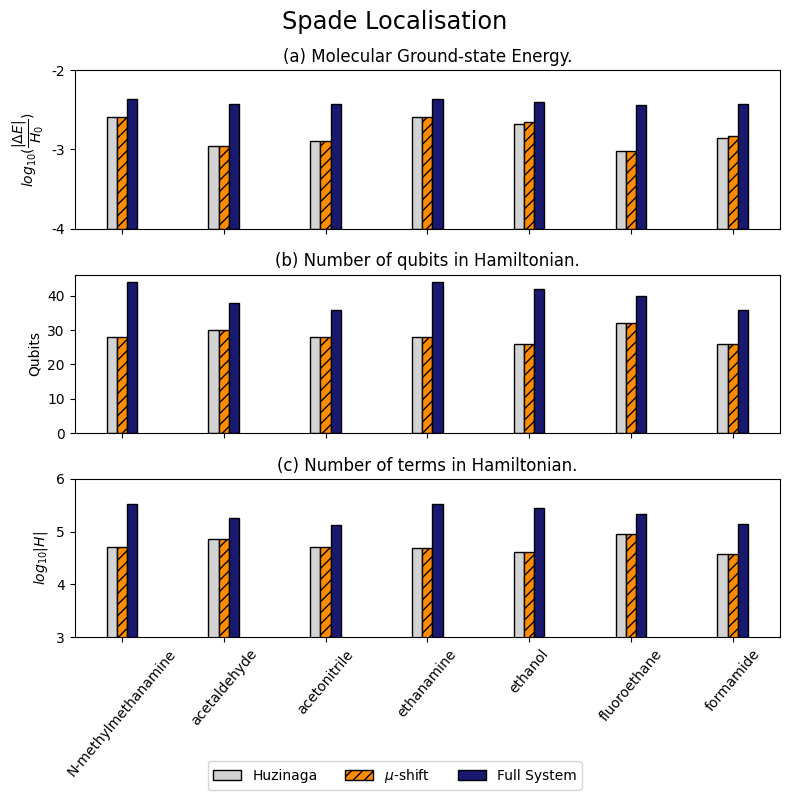

In [18]:
spade_data = format_data(data["spade"])

print_tables("spade", *spade_data)
plot_results("spade", *spade_data)

Ibo Localisation

QUBITS
                     Full  Mu  Huz
N-methylmethanamine    44  22   22
acetaldehyde           38  28   28
acetonitrile           36  26   26
ethanamine             44  26   26
ethanol                42  24   24
fluoroethane           40  26   26
formamide              36  24   24

TERMS
                       Full     Mu    Huz
N-methylmethanamine  338967  20838  20838
acetaldehyde         182702  54011  54259
acetonitrile         136075  34584  35588
ethanamine           329299  40028  40340
ethanol              283020  29737  29737
fluoroethane         217385  38180  38164
formamide            138231  26769  26769

 Full System Values
                    $\epsilon_{DFT}$   Q     |H|
N-methylmethanamine         0.573387  44  338967
acetaldehyde                0.569153  38  182702
acetonitrile                0.484653  36  136075
ethanamine                  0.572698  44  329299
ethanol                     0.609166  42  283020
fluoroethane                0.636886 

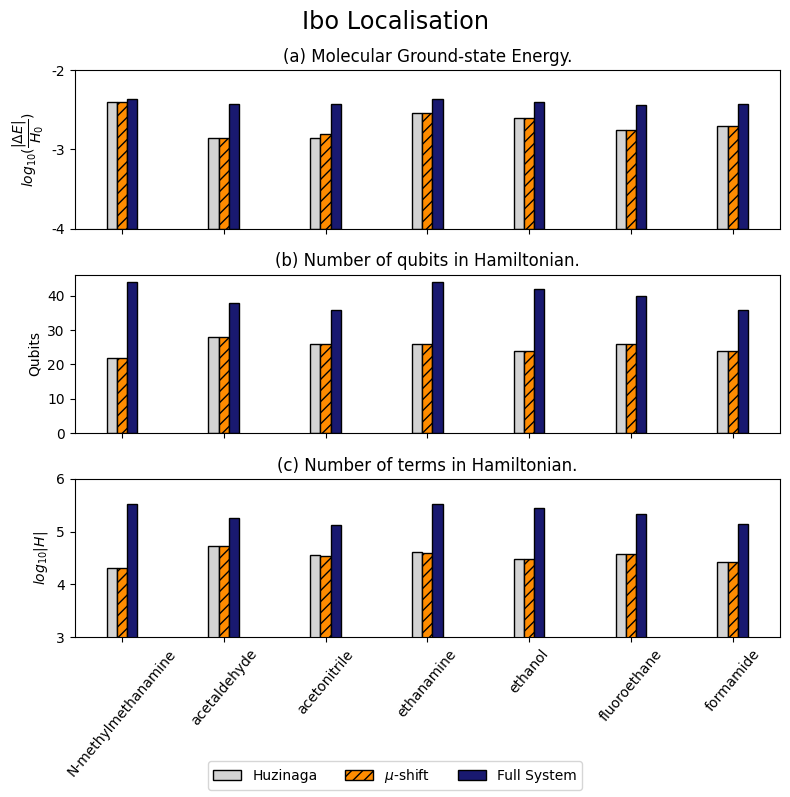

In [48]:
ibo_data = format_data(data["ibo"])

print_tables("ibo", *ibo_data)
plot_results("ibo", *ibo_data)

### Water bond stretching

\begin{tabular}{lrrrrrrllllll}
\toprule
 & bond_length & global_FCI & global_DFT & huz emb FCI & mu emb FCI & global_terms & huz_terms & mu_terms & global_qubits & huz_qubits & mu_qubits & N active MOs \\
\midrule
0 & 0.400000 & -72.981056 & -73.259936 & -72.988008 & -72.988008 & 2110.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 0.600000 & -74.499220 & -74.773419 & -74.508545 & -74.508545 & 2110.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 0.798954 & -74.851089 & -75.122053 & -74.864001 & -74.864002 & 1086.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 1.000000 & -74.900658 & -75.170068 & -74.918225 & -74.918226 & 2110.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 1.200000 & -74.867498 & -75.134418 & -74.890912 & -74.890913 & 2110.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 1.500000 & -74.807539 & -75.057383 & -74.840738 & -74.840739 & 2110.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 2.000000 & -74.776263 & -74.962535 & -74.816902 & -74.816903 & 2110.000000 & 1079 & 1079 & 1

,bond_length,global_FCI,global_DFT,huz emb FCI,mu emb FCI,global_terms,huz_terms,mu_terms,global_qubits,huz_qubits,mu_qubits,N active MOs
0,0.400000,-72.981056,-73.259936,-72.988008,-72.988008,2110.0,1079,1079,14,12,12,4
0,0.600000,-74.499220,-74.773419,-74.508545,-74.508545,2110.0,1079,1079,14,12,12,4
0,0.798954,-74.851089,-75.122053,-74.864001,-74.864002,1086.0,1079,1079,14,12,12,4
0,1.000000,-74.900658,-75.170068,-74.918225,-74.918226,2110.0,1079,1079,14,12,12,4
0,1.200000,-74.867498,-75.134418,-74.890912,-74.890913,2110.0,1079,1079,14,12,12,4
0,1.500000,-74.807539,-75.057383,-74.840738,-74.840739,2110.0,1079,1079,14,12,12,4
0,2.000000,-74.776263,-74.962535,-74.816902,-74.816903,2110.0,1079,1079,14,12,12,4
0,3.000000,-74.771826,-74.890579,-74.820209,-74.820210,2430.0,1211,1175,14,12,12,4
0,4.000000,-74.771720,-74.876127,-74.820269,-74.820269,2314.0,1819,1079,14,12,12,4
0,5.000000,-74.771718,-74.872360,-74.820210,-74.820210,3282.0,1795,1795,14,12,12,4


,bond_length,global_FCI,global_DFT,huz emb FCI,mu emb FCI,global_terms,huz_terms,mu_terms,global_qubits,huz_qubits,mu_qubits,N active MOs
0,0.400000,-72.981056,-73.259936,-72.887821,-72.887827,2110.0,1079,1079,14,12,12,4
0,0.600000,-74.499220,-74.773419,-74.473689,-74.473690,2110.0,1079,1079,14,12,12,4
0,0.798954,-74.851089,-75.122053,-74.864001,-74.864002,1086.0,1079,1079,14,12,12,4
0,1.000000,-74.900658,-75.170068,-74.936101,-74.936101,2110.0,1079,1079,14,12,12,4
0,1.200000,-74.867498,-75.134418,-74.914336,-74.914336,2110.0,1079,1079,14,12,12,4
0,1.500000,-74.807539,-75.057383,-74.847327,-74.847327,2110.0,1079,1079,14,12,12,4
0,2.000000,-74.776263,-74.962535,-74.755507,-74.755507,2110.0,1079,1079,14,12,12,4
0,3.000000,-74.771826,-74.890579,-74.683921,-74.683921,2250.0,1095,1119,14,12,12,4
0,4.000000,-74.771720,-74.874152,-74.667467,-74.667467,2170.0,1159,1159,14,12,12,4
0,5.000000,-74.771718,-74.871551,-74.667841,-74.667841,3062.0,1795,1803,14,12,12,4


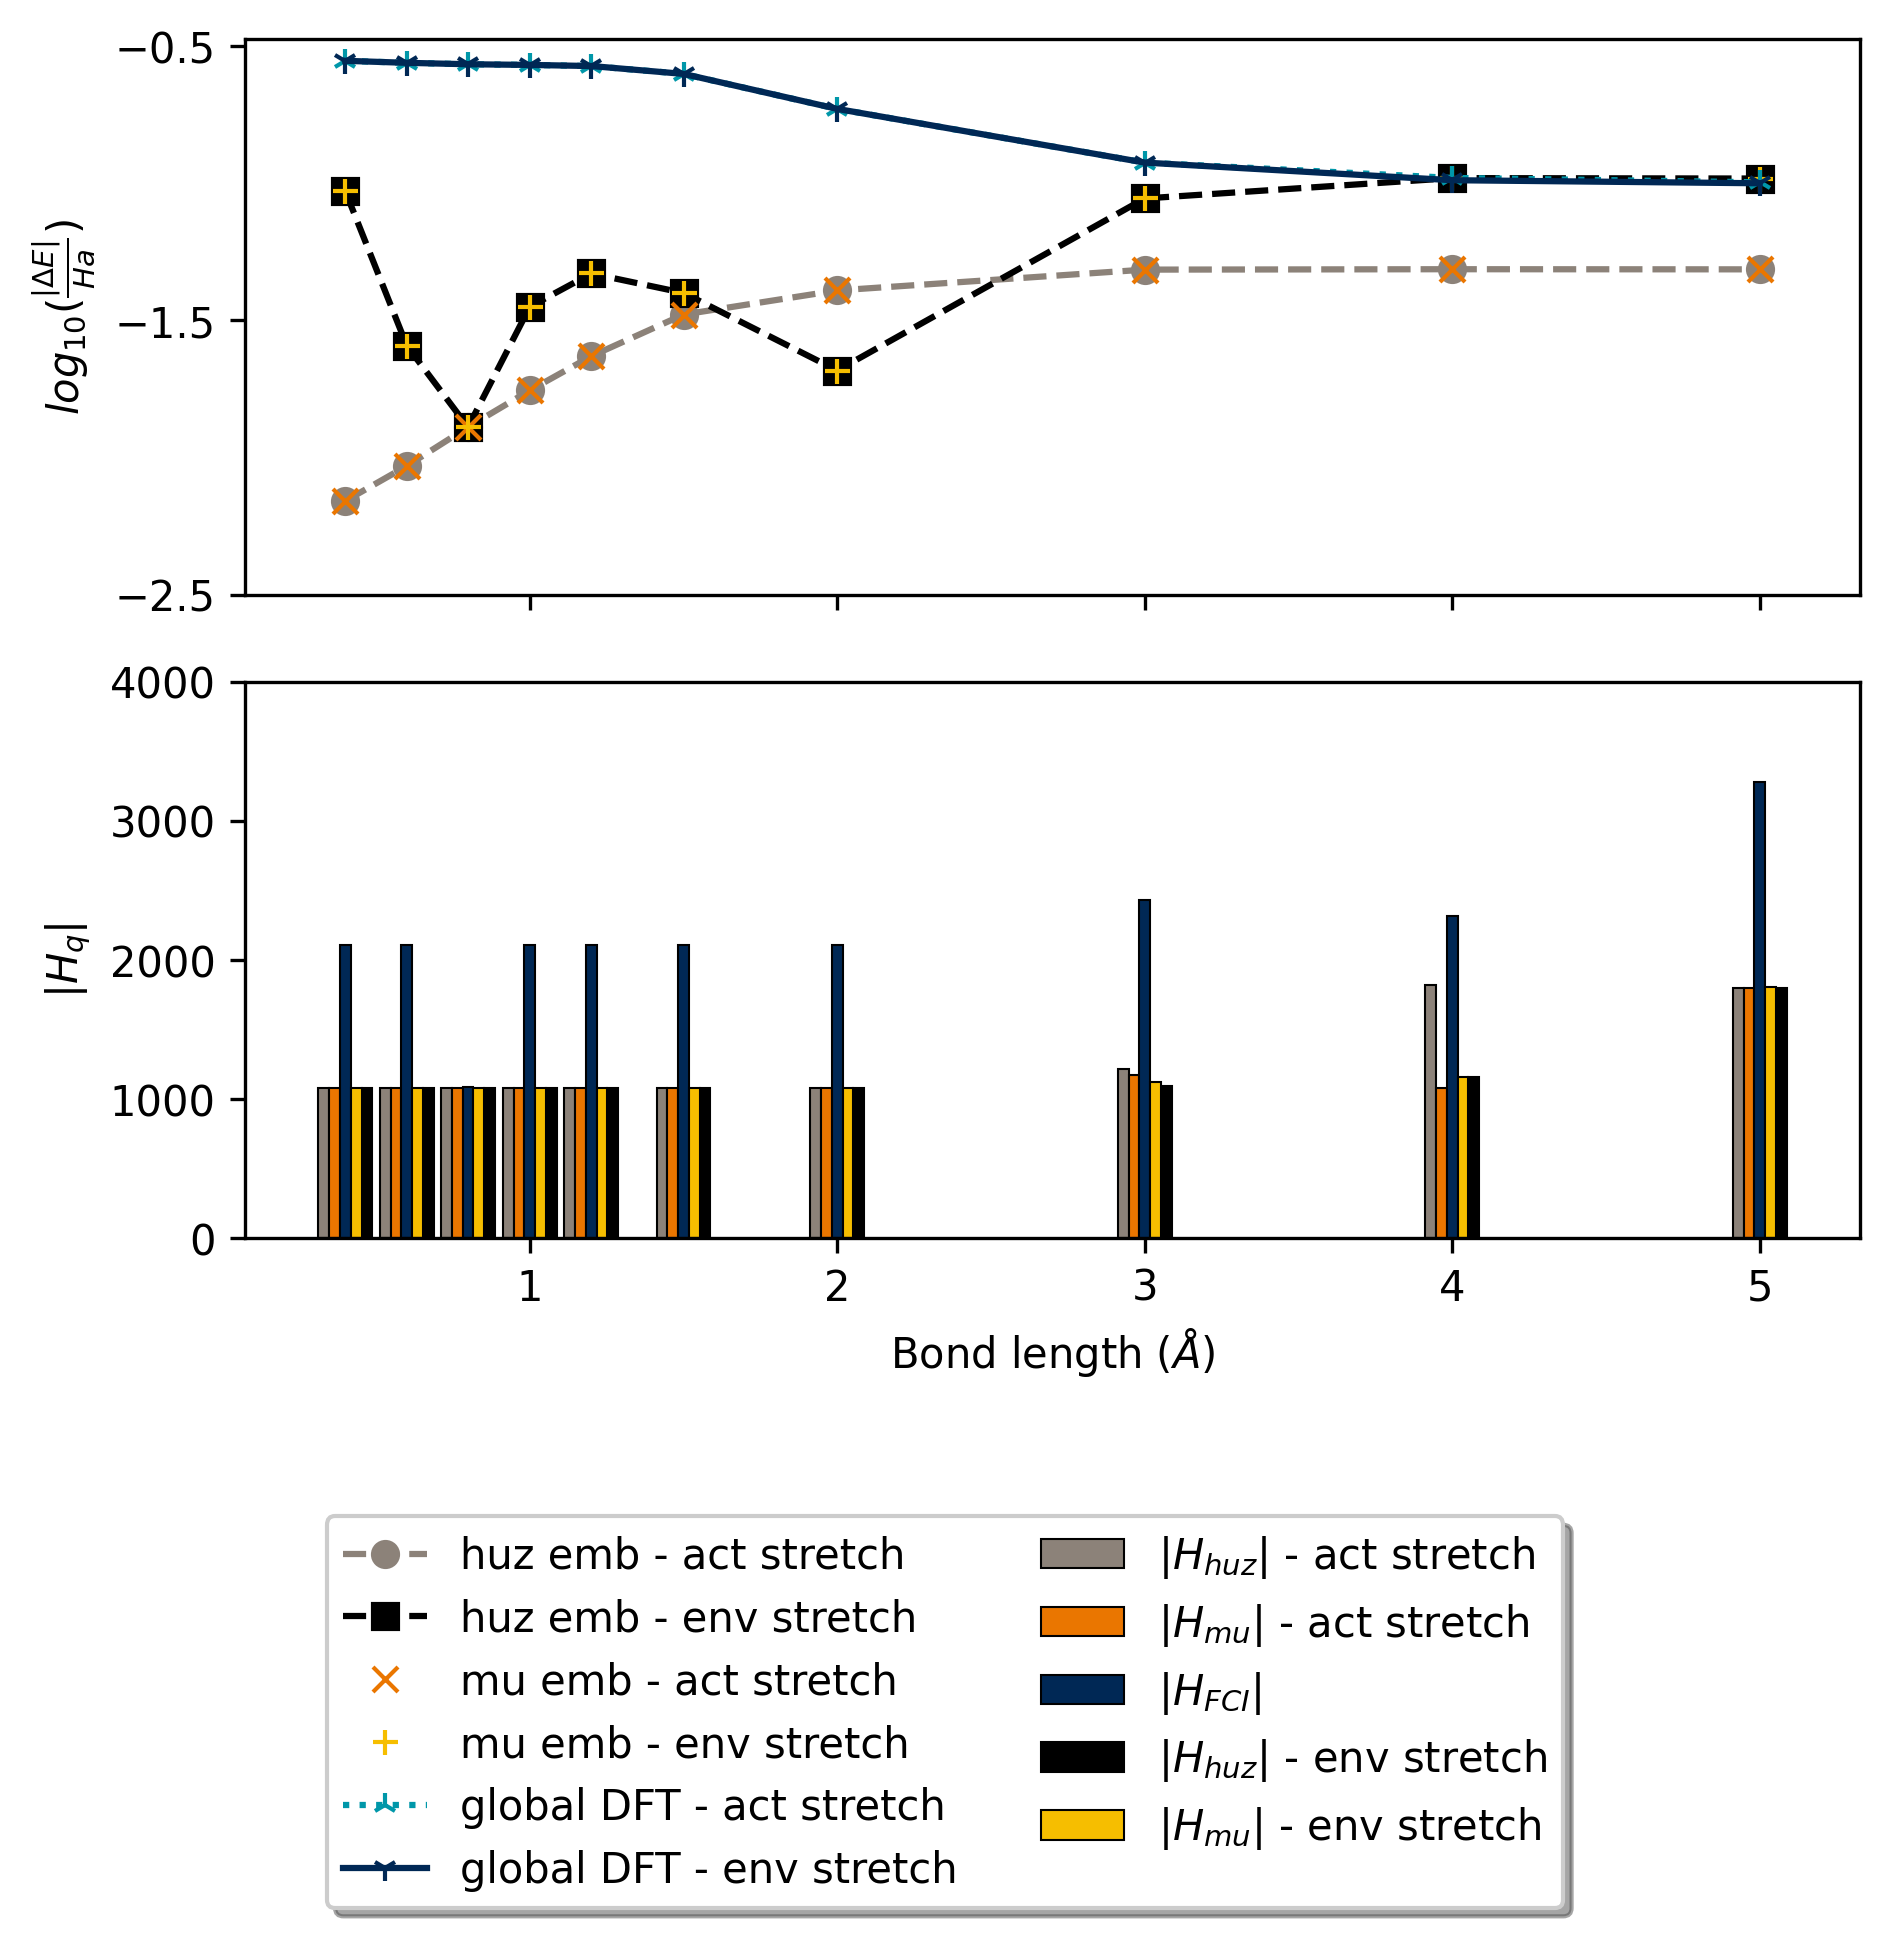

In [78]:
from IPython.display import display

cols = [
    "bond_length",
    "global_FCI",
    "global_DFT",
    "huz emb FCI",
    "mu emb FCI",
    "global_terms",
    "huz_terms",
    "mu_terms",
    "global_qubits",
    "huz_qubits",
    "mu_qubits",
    "N active MOs",
]

pd.set_option("display.max_columns", None)
print(pd.read_pickle("data/spade_act.pkl")[cols].to_latex())
print(pd.read_pickle("data/spade_env.pkl")[cols].to_latex())
display(pd.read_pickle("data/spade_act.pkl")[cols])
display(pd.read_pickle("data/spade_env.pkl")[cols])

plot_water(pd.read_pickle("data/spade_act.pkl"), pd.read_pickle("data/spade_env.pkl"))

,bond_length,global_FCI,global_DFT,huz emb FCI,mu emb FCI,global_terms,huz_terms,mu_terms,global_qubits,huz_qubits,mu_qubits,N active MOs
0,0.400000,-72.981056,-73.259936,-72.935486,-72.923051,2110.0,492,492,14,10,10,3
0,0.600000,-74.499220,-74.773419,-74.484545,-74.484550,2110.0,492,492,14,10,10,3
0,0.798954,-74.851089,-75.122053,-74.852613,-74.852615,1086.0,1079,1079,14,12,12,4
0,1.000000,-74.900658,-75.170068,-74.899540,-74.899542,2110.0,1079,1079,14,12,12,4
0,1.200000,-74.867498,-75.134418,-74.868096,-74.868099,2110.0,1079,1079,14,12,12,4
0,1.500000,-74.807539,-75.057383,-74.819774,-74.819777,2110.0,1079,1079,14,12,12,4
0,2.000000,-74.776263,-74.962535,-74.798954,-74.798956,2110.0,1079,1079,14,12,12,4
0,3.000000,-74.771826,-74.890579,-74.804435,-74.804443,2430.0,876,876,14,10,10,3
0,4.000000,-74.771720,-74.876127,-74.805034,-74.805037,2314.0,1815,1815,14,12,12,4
0,5.000000,-74.771718,-74.872360,-74.804966,-74.804968,3282.0,1759,1759,14,12,12,4


,bond_length,global_FCI,global_DFT,huz emb FCI,mu emb FCI,global_terms,huz_terms,mu_terms,global_qubits,huz_qubits,mu_qubits,N active MOs
0,0.400000,-72.981056,-73.259936,-73.002214,-73.002219,2110.0,1079,1079,14,12,12,4
0,0.600000,-74.499220,-74.773419,-74.519672,-74.519674,2110.0,1079,1079,14,12,12,4
0,0.798954,-74.851089,-75.122053,-74.852613,-74.852615,1086.0,1079,1079,14,12,12,4
0,1.000000,-74.900658,-75.170068,-74.927934,-74.927934,2110.0,1079,1079,14,12,12,4
0,1.200000,-74.867498,-75.134418,-74.911230,-74.911230,2110.0,1079,1079,14,12,12,4
0,1.500000,-74.807539,-75.057383,-74.847005,-74.847005,2110.0,1079,1079,14,12,12,4
0,2.000000,-74.776263,-74.962535,-74.755516,-74.755516,2110.0,1079,1079,14,12,12,4
0,3.000000,-74.771826,-74.890579,-74.683914,-74.683914,2250.0,1095,1119,14,12,12,4
0,4.000000,-74.771720,-74.874152,-74.667459,-74.667459,2170.0,1159,1159,14,12,12,4
0,5.000000,-74.771718,-74.871551,-74.664686,-74.664686,3062.0,1795,1803,14,12,12,4


\begin{tabular}{lrrrrrrllllll}
\toprule
 & bond_length & global_FCI & global_DFT & huz emb FCI & mu emb FCI & global_terms & huz_terms & mu_terms & global_qubits & huz_qubits & mu_qubits & N active MOs \\
\midrule
0 & 0.400000 & -72.981056 & -73.259936 & -72.935486 & -72.923051 & 2110.000000 & 492 & 492 & 14 & 10 & 10 & 3 \\
0 & 0.600000 & -74.499220 & -74.773419 & -74.484545 & -74.484550 & 2110.000000 & 492 & 492 & 14 & 10 & 10 & 3 \\
0 & 0.798954 & -74.851089 & -75.122053 & -74.852613 & -74.852615 & 1086.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 1.000000 & -74.900658 & -75.170068 & -74.899540 & -74.899542 & 2110.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 1.200000 & -74.867498 & -75.134418 & -74.868096 & -74.868099 & 2110.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 1.500000 & -74.807539 & -75.057383 & -74.819774 & -74.819777 & 2110.000000 & 1079 & 1079 & 14 & 12 & 12 & 4 \\
0 & 2.000000 & -74.776263 & -74.962535 & -74.798954 & -74.798956 & 2110.000000 & 1079 & 1079 & 14 & 

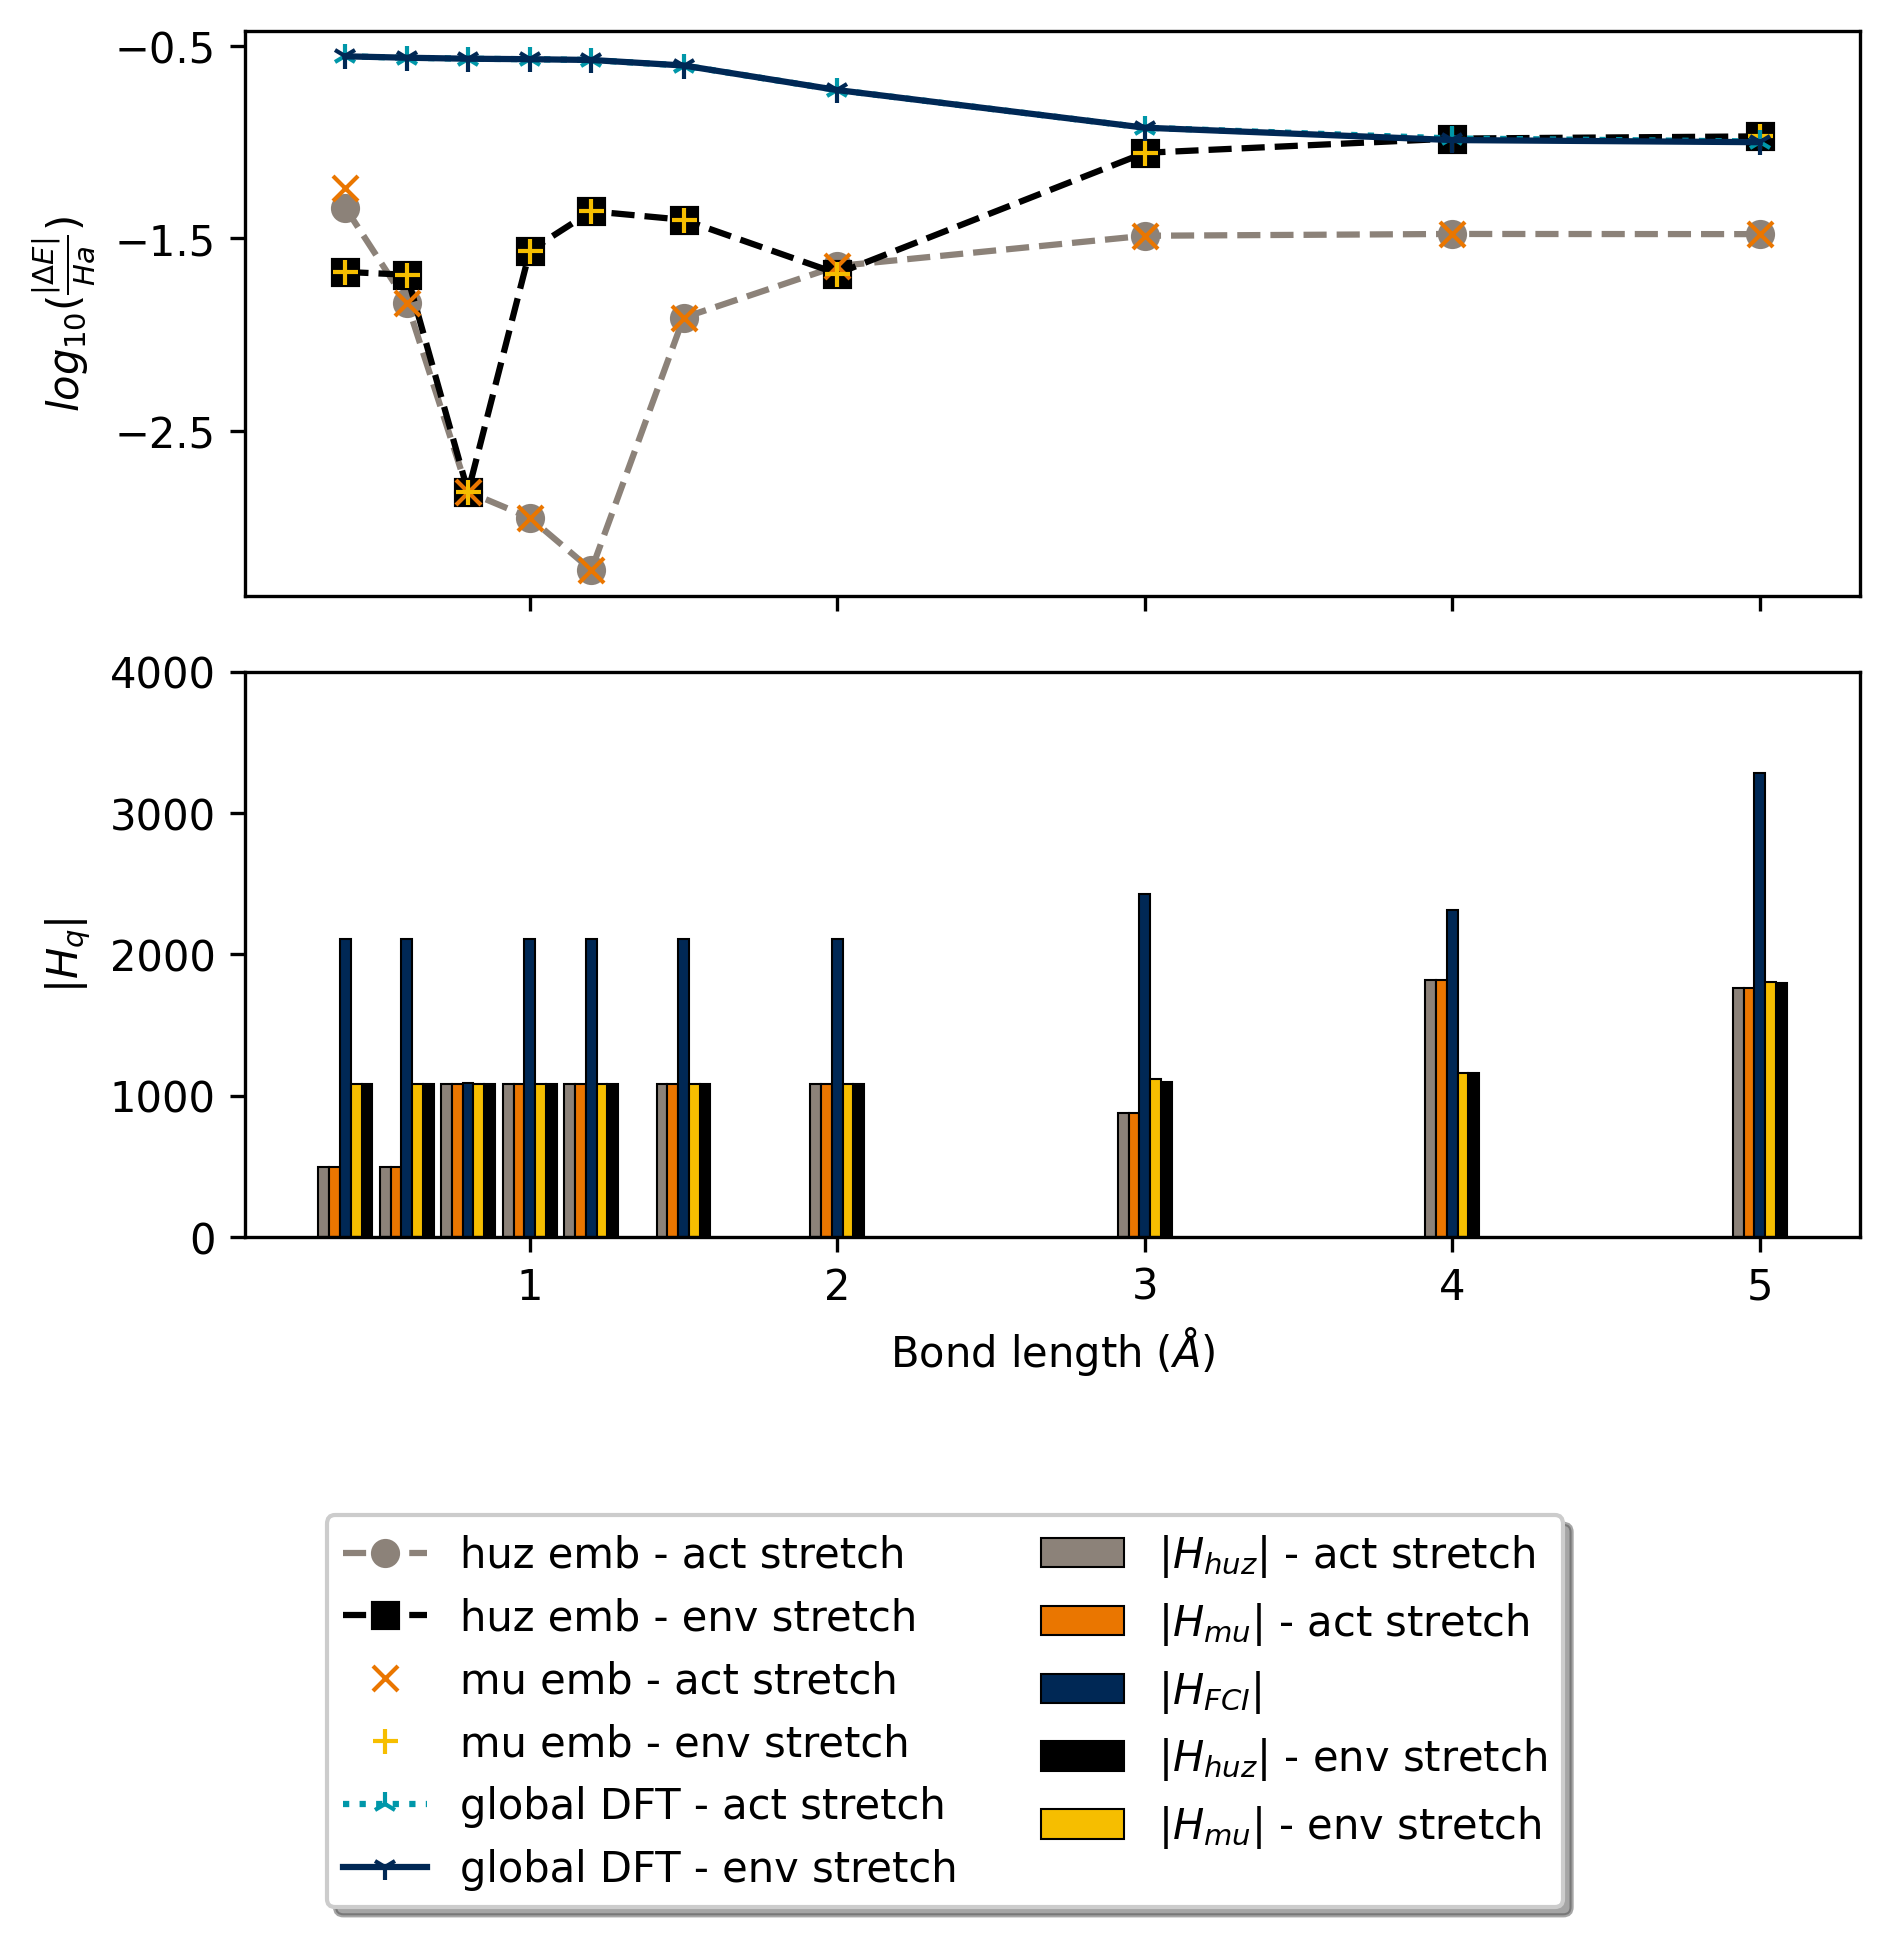

In [79]:
from IPython.display import display

cols = [
    "bond_length",
    "global_FCI",
    "global_DFT",
    "huz emb FCI",
    "mu emb FCI",
    "global_terms",
    "huz_terms",
    "mu_terms",
    "global_qubits",
    "huz_qubits",
    "mu_qubits",
    "N active MOs",
]
pd.set_option("display.max_columns", None)
display(pd.read_pickle("data/ibo_act.pkl")[cols])
display(pd.read_pickle("data/ibo_env.pkl")[cols])
print(pd.read_pickle("data/ibo_act.pkl")[cols].to_latex())
print(pd.read_pickle("data/ibo_env.pkl")[cols].to_latex())

plot_water(pd.read_pickle("data/ibo_act.pkl"), pd.read_pickle("data/ibo_env.pkl"))

,bond_length,global_FCI,global_DFT,huz emb FCI,mu emb FCI,global_terms,huz_terms,mu_terms,global_qubits,huz_qubits,mu_qubits,N active MOs
0,0.400000,-72.981056,-73.259936,-72.935486,-72.923051,2110.0,492,492,14,10,10,3
0,0.600000,-74.499220,-74.773419,-74.484545,-74.484550,2110.0,492,492,14,10,10,3
0,0.798954,-74.851089,-75.122053,-74.852613,-74.852615,1086.0,1079,1079,14,12,12,4
0,1.000000,-74.900658,-75.170068,-74.899540,-74.899542,2110.0,1079,1079,14,12,12,4
0,1.200000,-74.867498,-75.134418,-74.868096,-74.868099,2110.0,1079,1079,14,12,12,4
0,1.500000,-74.807539,-75.057383,-74.819774,-74.819777,2110.0,1079,1079,14,12,12,4
0,2.000000,-74.776263,-74.962535,-74.798954,-74.798956,2110.0,1079,1079,14,12,12,4
0,3.000000,-74.771826,-74.890579,-74.804932,-74.804934,2430.0,1383,1383,14,12,12,4
0,4.000000,-74.771720,-74.876127,-74.805034,-74.805037,2314.0,1815,1815,14,12,12,4
0,5.000000,-74.771718,-74.872360,-74.804966,-74.804968,3282.0,1759,1759,14,12,12,4


,bond_length,global_FCI,global_DFT,huz emb FCI,mu emb FCI,global_terms,huz_terms,mu_terms,global_qubits,huz_qubits,mu_qubits,N active MOs
0,0.400000,-72.981056,-73.259936,-73.002214,-73.002219,2110.0,1079,1079,14,12,12,4
0,0.600000,-74.499220,-74.773419,-74.519672,-74.519674,2110.0,1079,1079,14,12,12,4
0,0.798954,-74.851089,-75.122053,-74.852613,-74.852615,1086.0,1079,1079,14,12,12,4
0,1.000000,-74.900658,-75.170068,-74.927934,-74.927934,2110.0,1079,1079,14,12,12,4
0,1.200000,-74.867498,-75.134418,-74.911230,-74.911230,2110.0,1079,1079,14,12,12,4
0,1.500000,-74.807539,-75.057383,-74.847005,-74.847005,2110.0,1079,1079,14,12,12,4
0,2.000000,-74.776263,-74.962535,-74.755516,-74.755516,2110.0,1079,1079,14,12,12,4
0,3.000000,-74.771826,-74.890579,-74.683914,-74.683914,2250.0,1095,1119,14,12,12,4
0,4.000000,-74.771720,-74.874152,-74.667459,-74.667459,2170.0,1159,1159,14,12,12,4
0,5.000000,-74.771718,-74.871551,-74.664686,-74.664686,3062.0,1795,1803,14,12,12,4


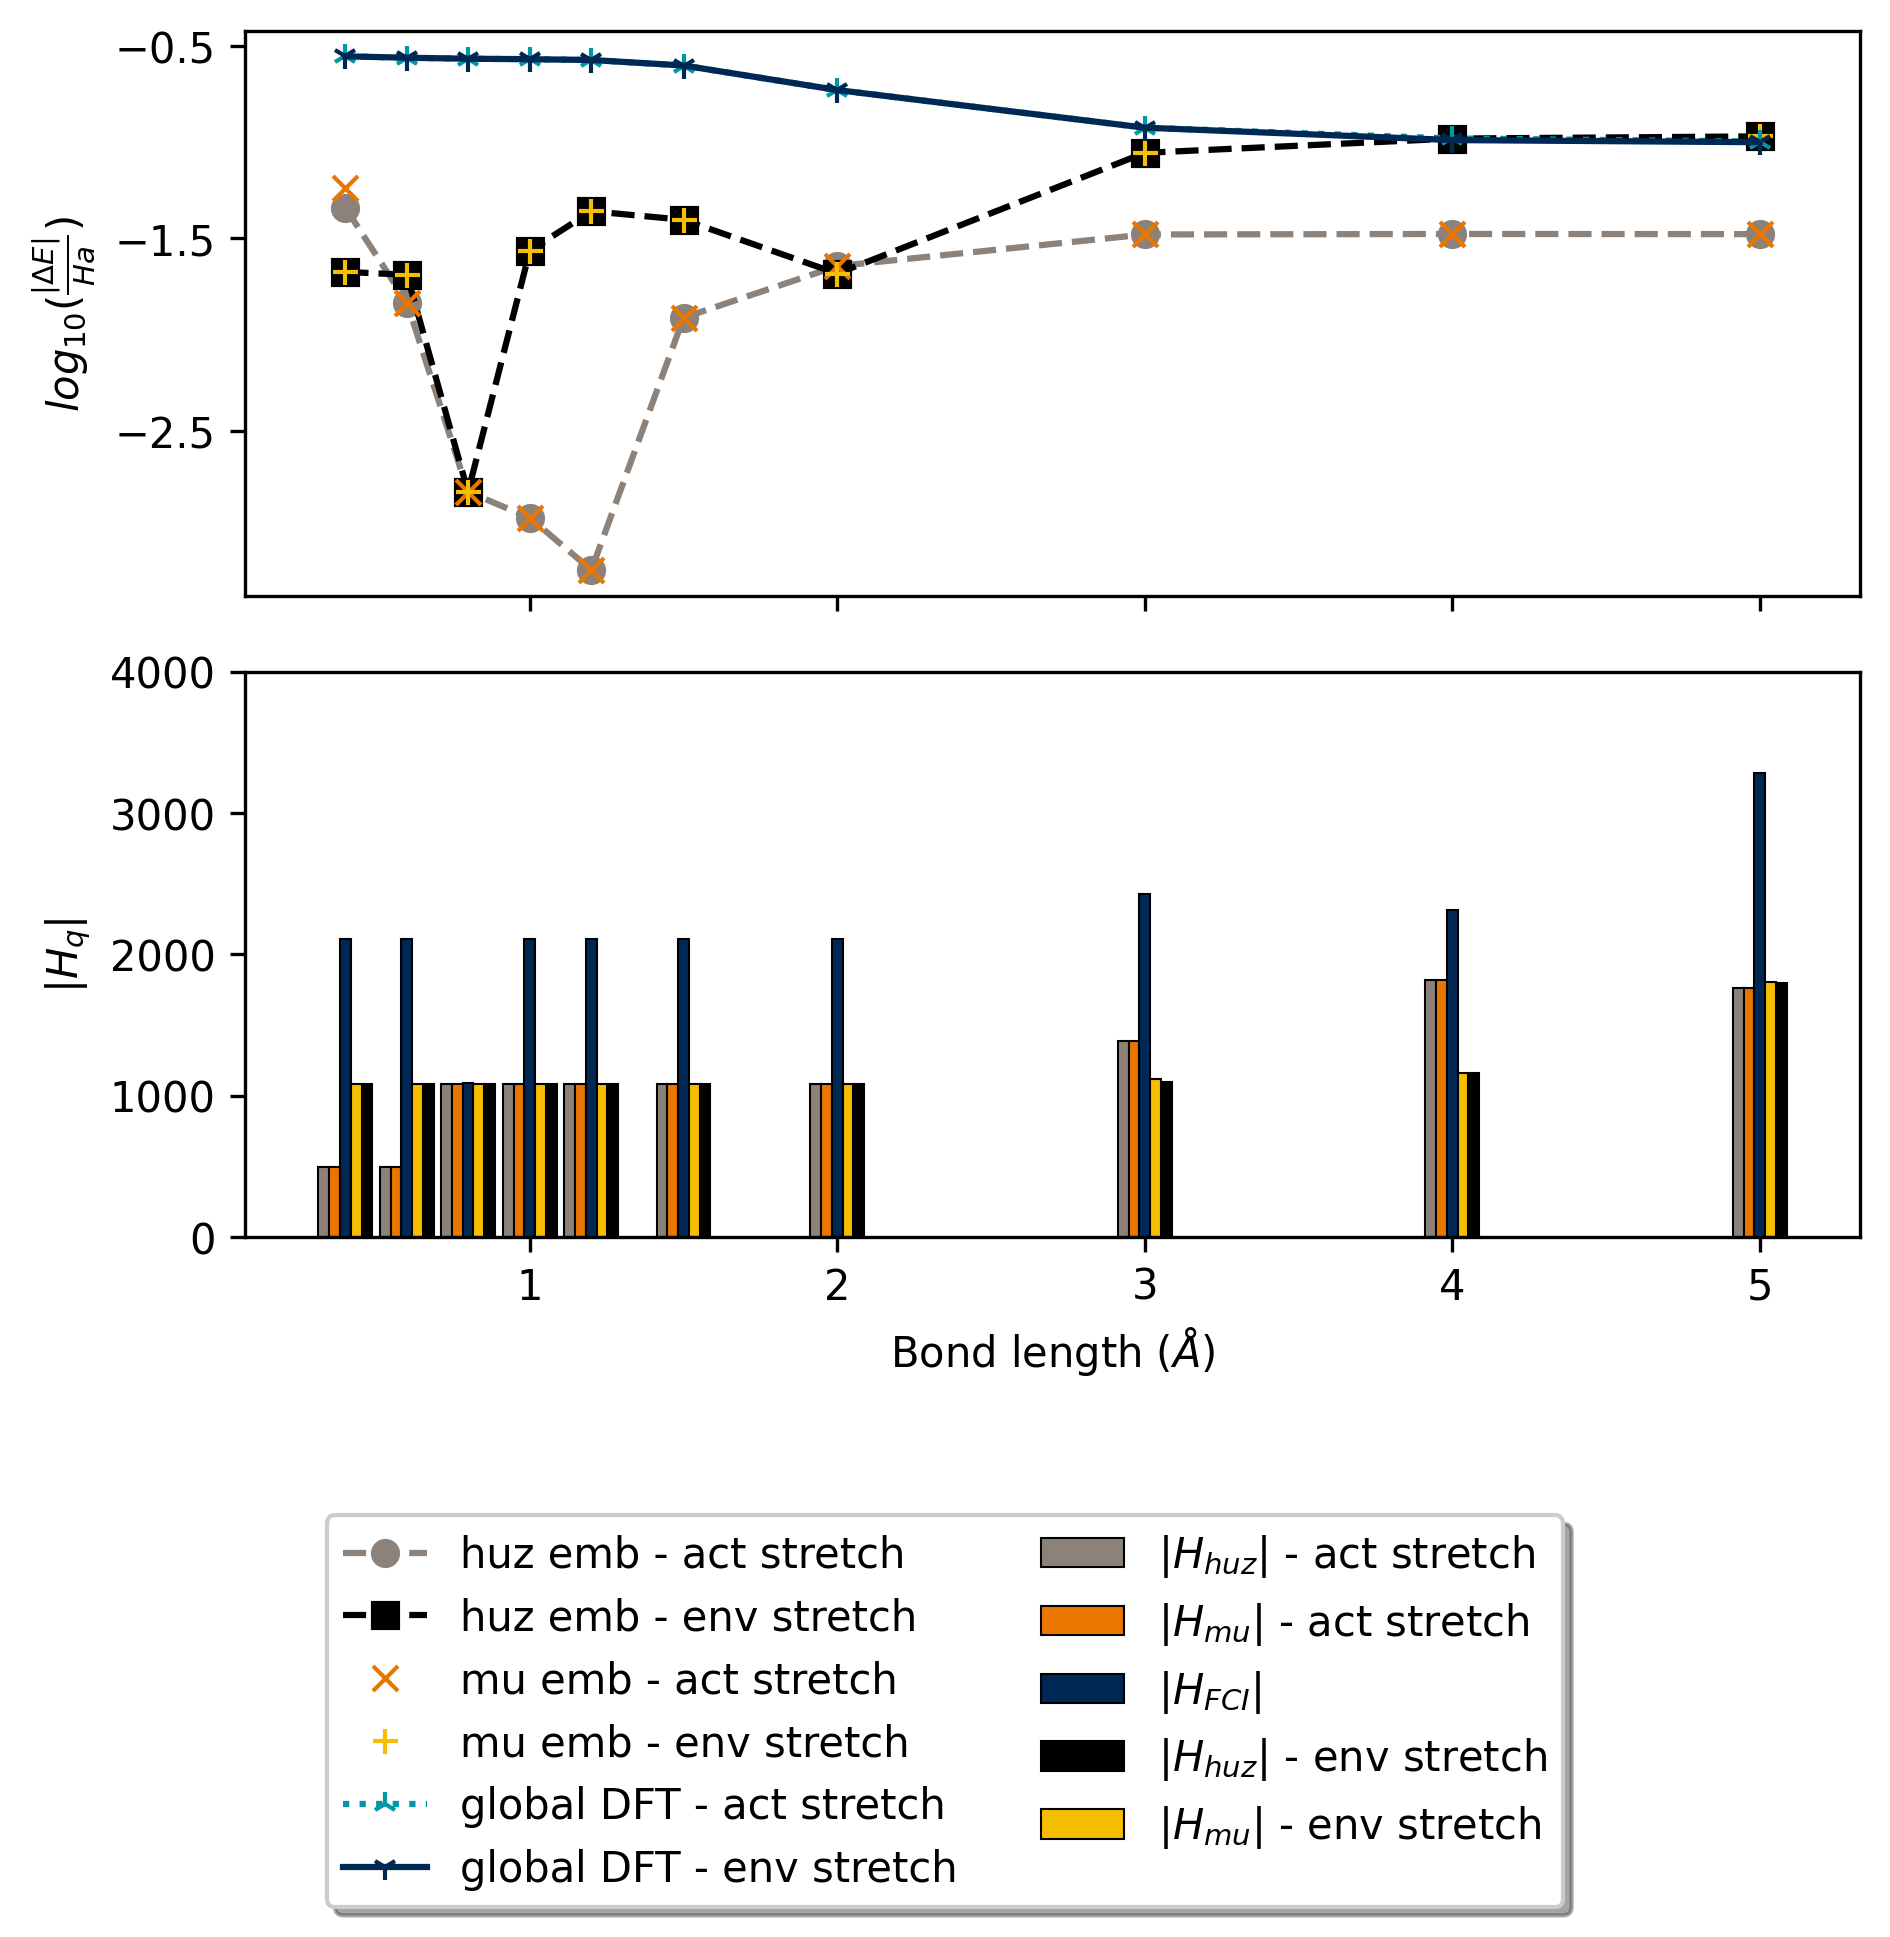

In [80]:
from IPython.display import display

cols = [
    "bond_length",
    "global_FCI",
    "global_DFT",
    "huz emb FCI",
    "mu emb FCI",
    "global_terms",
    "huz_terms",
    "mu_terms",
    "global_qubits",
    "huz_qubits",
    "mu_qubits",
    "N active MOs",
]

pd.set_option("display.max_columns", None)
display(pd.read_pickle("data/ibo_90_act.pkl")[cols])
display(pd.read_pickle("data/ibo_90_env.pkl")[cols])

plot_water(pd.read_pickle("data/ibo_90_act.pkl"), pd.read_pickle("data/ibo_90_env.pkl"))

### Cyclopentane Results

/var/folders/b6/r25qxhld1ls1sll052q1dw5h0000gn/T/ipykernel_22062/2101974098.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


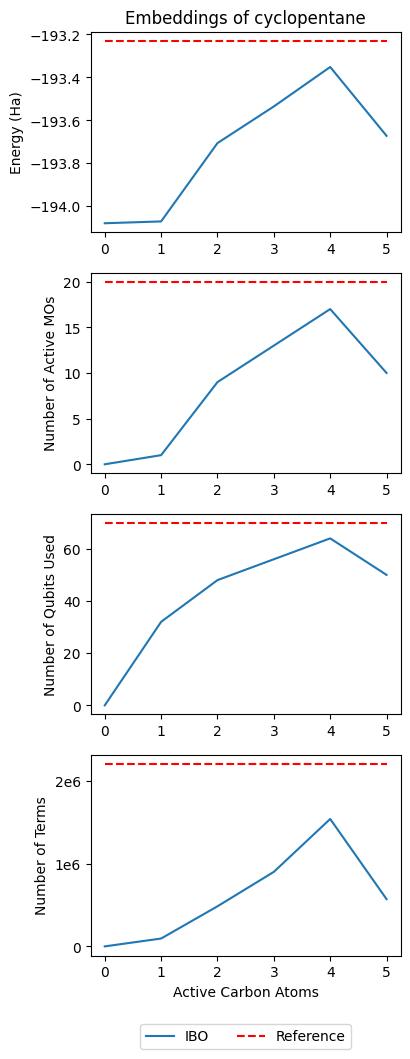

In [81]:
plot_cyclopentane(pd.read_json("data/cyclopentane_spade.json"))

/var/folders/b6/r25qxhld1ls1sll052q1dw5h0000gn/T/ipykernel_22062/2101974098.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


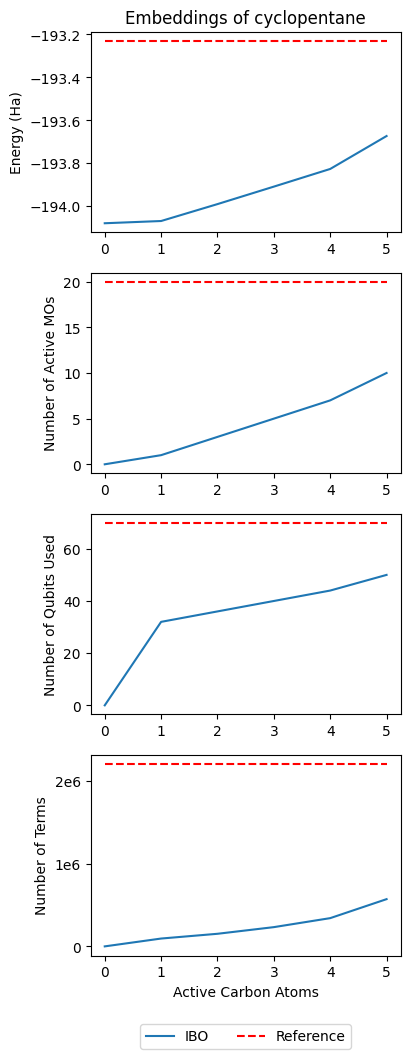

In [82]:
plot_cyclopentane(pd.read_json("data/cyclopentane_ibo.json"))

/var/folders/b6/r25qxhld1ls1sll052q1dw5h0000gn/T/ipykernel_22062/2101974098.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


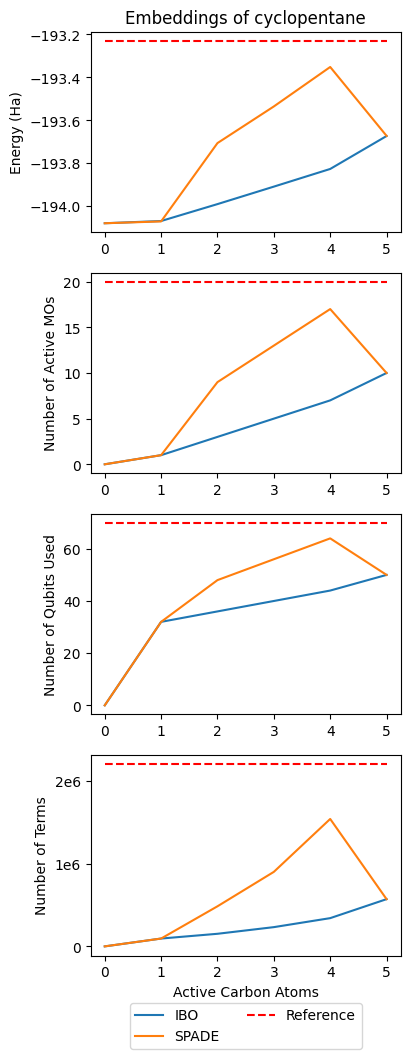

In [83]:
plot_cyclopentane(
    pd.read_json("data/cyclopentane_ibo.json"),
    pd.read_json("data/cyclopentane_spade.json"),
)